<a href="https://colab.research.google.com/github/Chandan2597/Cardiovascular-risk-prediction/blob/main/Cardiovascular_Risk_Prediction_%7C_ML_Classification_submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Cardiovascular Risk Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name**            - Chandan Koiri

# **Project Summary -**

The objective of this project is to utilize machine learning techniques to predict the 10-year risk of future coronary heart disease (CHD) in patients, using data from the ongoing Framingham Heart Study, which involves residents of Framingham, Massachusetts. The dataset comprises over 4,000 patients and includes 15 attributes, each representing a potential risk factor for CHD. These attributes encompass demographic, behavioral, and medical factors.

### Data Preparation and Preprocessing
To ensure the dataset's quality and suitability for analysis, extensive preprocessing was conducted. Missing values were handled using median and mode imputation. Outliers were identified and removed using the Interquartile Range (IQR) method. To address skewness in continuous variables, log and square root transformations were applied, improving model performance by normalizing the data distribution.

### Feature Engineering and Selection
To enhance the dataset, feature selection was carried out using the Variance Inflation Factor (VIF) to eliminate multicollinearity. A new feature, pulse pressure, was created to capture the relationship between systolic and diastolic blood pressure. Additionally, redundant columns were removed to streamline the dataset. Key features identified for predicting CHD risk included 'Age', 'Sex', 'Education', 'Cigarettes per day (cigs_per_day)', 'Blood pressure medication (BPMeds)', 'Prevalent stroke', 'Prevalent hypertension (prevalent_hyp)', 'Diabetes', 'Total cholesterol', 'Body Mass Index (BMI)', 'Heart rate', 'Glucose', 'Pulse pressure'.

### Addressing Imbalanced Data
Given the imbalanced nature of the dataset, the Synthetic Minority Over-sampling Technique (SMOTE) combined with Tomek links undersampling was employed to balance the class distribution. This technique improved model performance by ensuring a more equitable representation of classes. Additionally, data scaling was performed using the Standard Scaler method to bring all features onto the same scale.

### Model Evaluation and Selection
Several machine learning models were evaluated based on their recall performance, as the primary objective was to maximize the identification of patients at risk of CHD. After thorough analysis, the tuned Neural Network emerged as the final prediction model due to its superior recall score. Prioritizing recall ensured that as many patients with CHD risk as possible were correctly identified, even at the expense of some false positives.

### Conclusion
This project demonstrates the efficacy of machine learning techniques in accurately predicting CHD risk in patients using data from a cardiovascular study. Through meticulous data preprocessing and transformation, careful feature selection, and choosing an optimal model based on recall performance, it was possible to achieve a positive business impact. Accurately predicting CHD risk can lead to timely interventions and improved patient outcomes, showcasing the potential of machine learning in healthcare.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRFClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import recall_score, precision_score, f1_score, make_scorer
from sklearn.model_selection import GridSearchCV
from imblearn.combine import SMOTETomek
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Cardiovascular risk data/data_cardiovascular_risk.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print('Rows', df.shape[0])
print('Columns', df.shape[1])

Rows 3390
Columns 17


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

<Axes: >

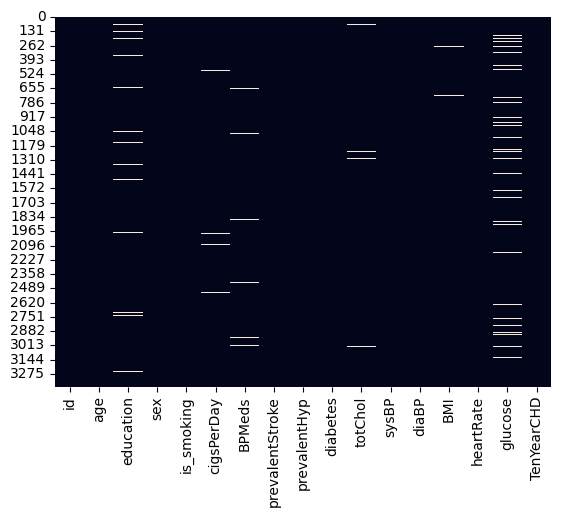

In [ ]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=False)

### What did you know about your dataset?

1. Dataset has 3390 observations and 17 features.
2. No duplicate value found in the dataset.
3. Null/Missing values - 510
4. Columns 'sex' and 'is_smoking' are having object datatype, which should be numeric type(for modelling purpose).

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

id          age    education   cigsPerDay       BPMeds  \
count  3390.000000  3390.000000  3303.000000  3368.000000  3346.000000   
mean   1694.500000    49.542183     1.970936     9.069477     0.029886   
std     978.753033     8.592878     1.019081    11.879078     0.170299   
min       0.000000    32.000000     1.000000     0.000000     0.000000   
25%     847.250000    42.000000     1.000000     0.000000     0.000000   
50%    1694.500000    49.000000     2.000000     0.000000     0.000000   
75%    2541.750000    56.000000     3.000000    20.000000     0.000000   
max    3389.000000    70.000000     4.000000    70.000000     1.000000   

       prevalentStroke  prevalentHyp     diabetes      totChol       sysBP  \
count      3390.000000   3390.000000  3390.000000  3352.000000  3390.00000   
mean          0.006490      0.315339     0.025664   237.074284   132.60118   
std           0.080309      0.464719     0.158153    45.247430    22.29203   
min           0.000000      0.000000     0.000000   107.000000    83.50000   
25%           0.000000      0.000000     0.000000   206.000000   117.00000   
50%           0.000000      0.000000     0.000000   234.000000   128.50000   
75%           0.000000      1.000000     0.000000   264.000000   144.00000   
max           1.000000      1.000000     1.000000   696.000000   295.00000   

             diaBP          BMI    heartRate      glucose   TenYearCHD  
count  3390.000000  3376.000000  3389.000000  3086.000000  3390.000000  
mean     82.883038    25.794964    75.977279    82.086520     0.150737  
std      12.023581     4.115449    11.971868    24.244753     0.357846  
min      48.000000    15.960000    45.000000    40.000000     0.000000  
25%      74.500000    23.020000    68.000000    71.000000     0.000000  
50%      82.000000    25.380000    75.000000    78.000000     0.000000  
75%      90.000000    28.040000    83.000000    87.000000     0.000000  
max     142.500000    56.800000   143.000000   394.000000     1.000000

### Variables Description

**id** : Unique identifier for each individual in the dataset.

**age** : Age of the individual in years.

**education** : Education level of the individual. This could be encoded categorically (e.g. high school, graduate, postgraduate) or numerically (e.g. years of education completed).

**sex** : Biological sex of the individual ( 0 for female, 1 for male).

**is_smoking** : Indicates whether the individual is currently smoking or not (0 for non-smoker, 1 for smoker).

**cigsPerDay** : Number of ciggerates smoked per day by the individual.

**BPMeds** : This indicates whether the individual is taking blood pressure medication (0 for no, 1 for yes).

**prevalentStroke** : It indicates whether the individual has a history of stroke (0 for no, 1 for yes).

**prevalentHyp** : This indicates whether the individual has prevalent hypertension (0 for no, 1 for yes).

**diabetes** : It indicates whether the individual has diabetes (0 for no, 1 for yes).

**totChol** : This represents the total cholestrol level of the individual in mg/dl (miligram per decilitre).

**sysBP** : Systolic blood pressure of the individual in mmHg (milimeters of mercury).

**diaBP** : Diastolic blood pressure of the individual in mmHg.

**BMI** : Body mass index of the individual.

**heartRate** : Resting heart rate of the individual in beats per minute.

**glucose** : Blood glucose level of the individual in mg/dl.

**TenYearCHD** : Presence or absence of the ten-year risk of developing coronary heart disease (CHD) for the individual (0 for no risk, 1 for risk).

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

id                 3390
age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Handling missing values

#Checking null values
df.isnull().sum().sort_values(ascending=False)

glucose            304
education           87
BPMeds              44
totChol             38
cigsPerDay          22
BMI                 14
heartRate            1
id                   0
diaBP                0
sysBP                0
prevalentHyp         0
diabetes             0
age                  0
prevalentStroke      0
is_smoking           0
sex                  0
TenYearCHD           0
dtype: int64

In [ ]:
# Checking columnwise missing value percentage
def show_missing():
    missing = df.columns[df.isnull().any()].tolist()
    return missing

print(round(df[show_missing()].isnull().sum().sort_values(ascending=False)/len(df)*100,2))

glucose       8.97
education     2.57
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
BMI           0.41
heartRate     0.03
dtype: float64


In [ ]:
# Imputing numerical missing values with median
df['glucose'] = df['glucose'].fillna(df['glucose'].median())

df['totChol'] = df['totChol'].fillna(df['totChol'].median())

df['cigsPerDay'] = df['cigsPerDay'].fillna(df['cigsPerDay'].median())

df['BMI'] = df['BMI'].fillna(df['BMI'].median())

df['heartRate'] = df['heartRate'].fillna(df['heartRate'].median())

In [ ]:
# Imputing categorical missing data with mode
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].mode()[0])

df['education'] = df['education'].fillna(df['education'].mode()[0])

In [ ]:
# Checking missing values again
df.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
# Dropping 'id' column as it doesn't serve any purpose in dataset
df = df.drop(columns='id')

In [ ]:
# Dividing numerical and categorical variables

# Categorical variables
categorical = [var for var in df.columns if df[var].dtype=='O']
print('Categorical Variables:', categorical)

# Numerical variables
numerical = [var for var in df.columns if df[var].dtype!='O']
print('Numerical Variables:', numerical)

Categorical Variables: ['sex', 'is_smoking']
Numerical Variables: ['age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']


In [ ]:
# Assigning a variable for discrete features and assigning features to it which has less than 20 classes
discrete = []
for var in df.columns:
    if var not in ['TenYearCHD']:
        if df[var].nunique()<20:
            print(var, 'values :', df[var].unique())
            discrete.append(var)
print('There are {} Discrete Variables:', format(len(discrete)))

education values : [2. 4. 1. 3.]
sex values : ['F' 'M']
is_smoking values : ['YES' 'NO']
BPMeds values : [0. 1.]
prevalentStroke values : [0 1]
prevalentHyp values : [0 1]
diabetes values : [0 1]
There are {} Discrete Variables: 7


In [ ]:
# Assigning variable for continuous features
continuous = [var for var in df.columns if var not in discrete and var not in ['TenYearCHD']]

In [ ]:
continuous

['age',
 'cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

### What all manipulations have you done and insights you found?

1. From the above analysis I found that the data has some missing values so I imputed them with median and mode features.

2. Segregated the data into discrete and continuous features for better understanding and analysis of independent variables.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Visualizing the dependent variable TenYearCHD

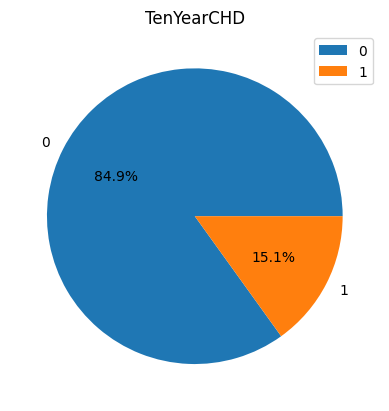

In [ ]:
# Chart - 1 Pie graph for TenYearCHD
df['TenYearCHD'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('TenYearCHD')
plt.ylabel('')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart was utilized to illustrate the proportions of the dependent variable.

##### 2. What is/are the insight(s) found from the chart?

'TenYearCHD' has 85% of 0 and 15% of 1 values which signifies that the data is highly imbalanced.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Data imbalance can effect the efficiency of the model. We need to use some sampling technique to treat the imbalanced data.

#### Chart - 2
Age and Risk of Disease

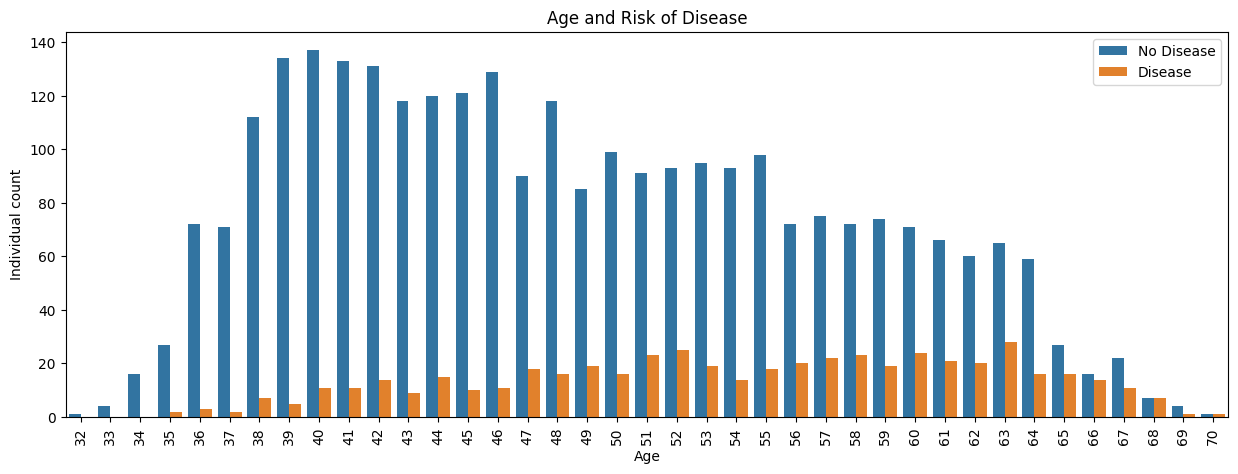

In [ ]:
# Chart - 2 age and TenYearCHD
plt.figure(figsize=(15,5))
sns.countplot(x='age', hue='TenYearCHD', data=df)
plt.title('Age and Risk of Disease')
plt.xlabel('Age')
plt.ylabel('Individual count')
plt.legend(['No Disease', 'Disease'])
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

Bar plot was used to show the Age wise Risk of disease.

##### 2. What is/are the insight(s) found from the chart?

The age group 50-60 has the highest number of patients, indicating a potential peak period for health monitoring and preventive measures.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights will help create a positive business impact by identifying critical age groups for targeted health interventions, potentially reducing CHD cases. No insights suggest negative growth, as the data highlights opportunities for preventive measures rather than adverse trends.

#### Chart - 3
Gender and Risk of disease

<Figure size 400x300 with 0 Axes>

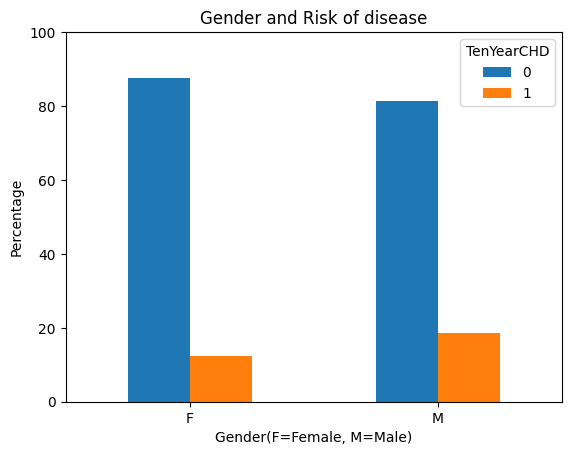

In [ ]:
# Chart - 3 'sex' and 'TenYearCHD'
plt.figure(figsize=(4,3))
freq = df.groupby('TenYearCHD')['sex'].value_counts().unstack(0)
pct = freq.divide(freq.sum(axis=1), axis=0)*100
pct.plot(kind='bar')
# Use plt.ylim to set the y-axis limits
plt.ylim(0,100)
plt.title('Gender and Risk of disease')
plt.ylabel('Percentage')
plt.xlabel('Gender(F=Female, M=Male)')
plt.xticks(rotation=0)
plt.show()

##### 1. Why did you pick the specific chart?

Bar plot was used to show the risk of disease into males and females.

##### 2. What is/are the insight(s) found from the chart?

Males has the higher risk of CHD in the next ten years as compared to females.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights will help create a positive business impact by identifying critical gender group for targeted health interventions, potentially reducing CHD cases. No insights suggest negative growth, as the data highlights opportunities for preventive measures rather than adverse trends.

#### Chart - 4
Smoking and Risk of disease

<Figure size 400x300 with 0 Axes>

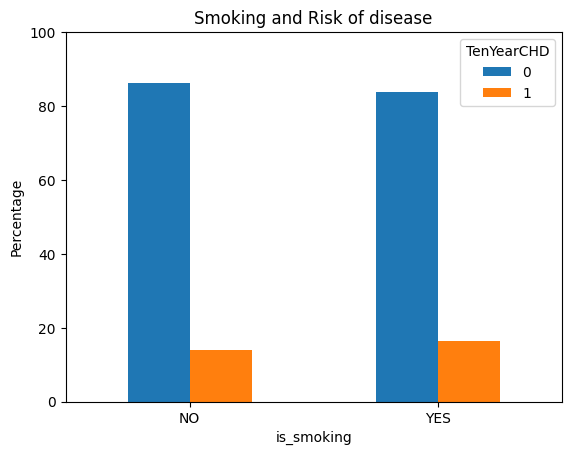

In [ ]:
# Chart - 4 ''is_smoking' and 'TenYearCHD'
plt.figure(figsize=(4,3))
freq = df.groupby('TenYearCHD')['is_smoking'].value_counts().unstack(0)
pct = freq.divide(freq.sum(axis=1), axis=0)*100
pct.plot(kind='bar')
# Use plt.ylim to set the y-axis limits
plt.ylim(0,100)
plt.title('Smoking and Risk of disease')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

##### 1. Why did you pick the specific chart?

Bar plot was used to compare the risk of disease in smoker and non smoker group.

##### 2. What is/are the insight(s) found from the chart?

The smokers are more prone to get CHD than non smokers but the difference is not significant.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can foster a positive business impact by pinpointing key groups for targeted health interventions, thereby potentially lowering CHD cases. The data does not indicate any negative growth, as it emphasizes opportunities for preventive measures instead of adverse trends.

#### Chart - 5
Blood Pressure medication and Risk of Disease

<Figure size 400x400 with 0 Axes>

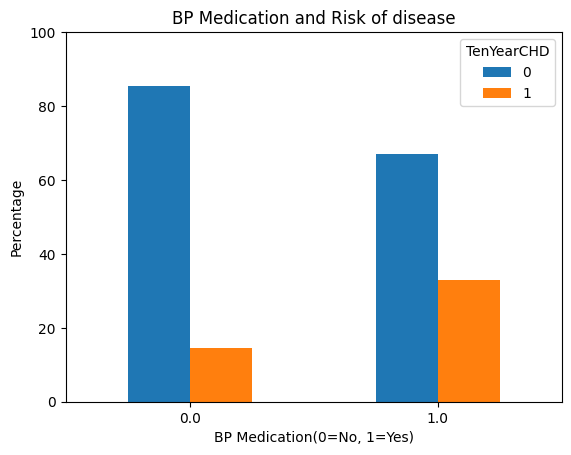

In [ ]:
# Chart - 5 'BPMeds' vs 'TenYearCHD'
plt.figure(figsize=(4,4))
freq = df.groupby('TenYearCHD')['BPMeds'].value_counts().unstack(0)
pct = freq.divide(freq.sum(axis=1), axis=0)*100
pct.plot(kind='bar')
# Use plt.ylim to set the y-axis limits
plt.ylim(0,100)
plt.title('BP Medication and Risk of disease')
plt.ylabel('Percentage')
plt.xlabel('BP Medication(0=No, 1=Yes)')
plt.xticks(rotation=0)
plt.show()

##### 1. Why did you pick the specific chart?

Used bar chart as I needed to show the comparison of percentage of CHD risk with respect to BP medication.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we can conclude that people who are taking Blood pressure medicines or people having Blood pressure problems are more prone to CHD.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights suggest that patients on BP medication have a higher percentage of CHD risk, indicating the need for better management and preventive strategies, which can create a positive business impact. No insights suggest negative growth, as the data highlights areas for improvement in patient care rather than declining trends.

#### Chart - 6
Prevalent Stroke and Risk of Disease

<Figure size 400x400 with 0 Axes>

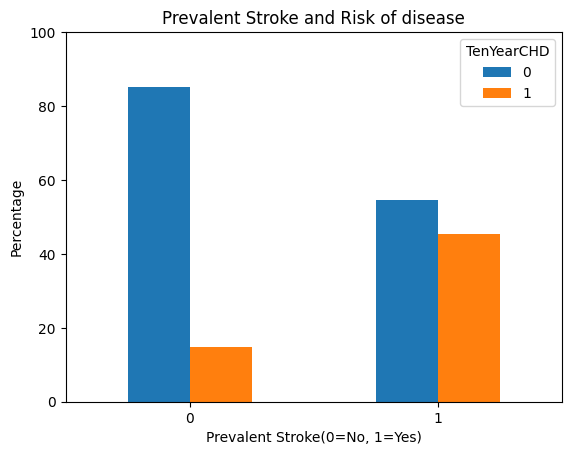

In [ ]:
# Chart - 6 'prevalentStroke' and 'TenYearCHD'
plt.figure(figsize=(4,4))
freq = df.groupby('TenYearCHD')['prevalentStroke'].value_counts().unstack(0)
pct = freq.divide(freq.sum(axis=1), axis=0)*100
pct.plot(kind='bar')
# Use plt.ylim to set the y-axis limits
plt.ylim(0,100)
plt.title('Prevalent Stroke and Risk of disease')
plt.ylabel('Percentage')
plt.xlabel('Prevalent Stroke(0=No, 1=Yes)')
plt.xticks(rotation=0)
plt.show()

##### 1. Why did you pick the specific chart?

Bar plot was used to show comparison between percentage of CHD risk with respect to Prevalent Stroke.

##### 2. What is/are the insight(s) found from the chart?

Patient with Prevalent Stroke symptoms has higher risk of 10 year CHD.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights indicate that patients with prevalent stroke symptoms exhibit a higher percentage of CHD risk, highlighting the need for enhanced management and preventive strategies, which can drive positive business impact. There are no indications of negative growth, as the data focuses on opportunities for improving patient care rather than adverse trends.

#### Chart - 7
Diabetes and Risk of Disease

<Figure size 400x400 with 0 Axes>

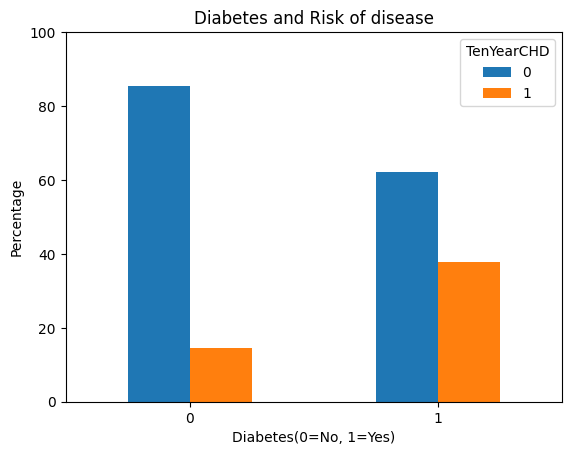

In [ ]:
# Chart - 7 'diabetes' vs 'TenYearCHD'
plt.figure(figsize=(4,4))
freq = df.groupby('TenYearCHD')['diabetes'].value_counts().unstack(0)
pct = freq.divide(freq.sum(axis=1), axis=0)*100
pct.plot(kind='bar')
# Use plt.ylim to set the y-axis limits
plt.ylim(0,100)
plt.title('Diabetes and Risk of disease')
plt.ylabel('Percentage')
plt.xlabel('Diabetes(0=No, 1=Yes)')
plt.xticks(rotation=0)
plt.show()

##### 1. Why did you pick the specific chart?

I used this bar chart to show the distribution of Risk of CHD over percentage of population having and not having diabetes.

##### 2. What is/are the insight(s) found from the chart?

Diabetic patient tend to have higher risk of CHD.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights reveal that patients with diabetes have a higher percentage of CHD risk, emphasizing the necessity for improved management and preventive measures, which can lead to positive business outcomes. No signs of negative growth are present, as the data points to opportunities for enhancing patient care rather than showing adverse trends.

#### Chart - 8
Prevalent Hypertension and Risk of Disease

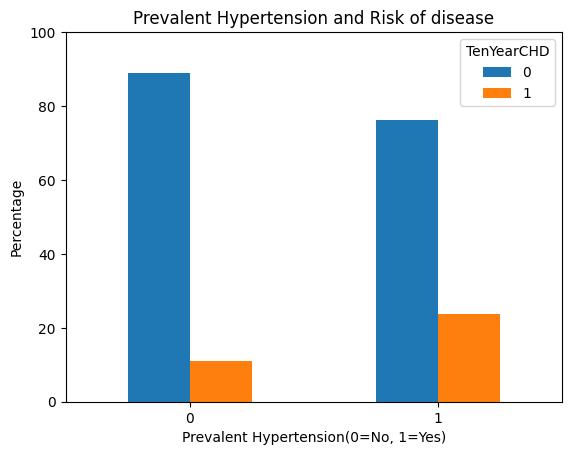

In [ ]:
# Chart - 8 'prevalentHyp' vs 'TenYearCHD'
freq = df.groupby('TenYearCHD')['prevalentHyp'].value_counts().unstack(0)
pct = freq.divide(freq.sum(axis=1), axis=0)*100
pct.plot(kind='bar')
# Use plt.ylim to set the y-axis limits
plt.ylim(0,100)
plt.title('Prevalent Hypertension and Risk of disease')
plt.ylabel('Percentage')
plt.xlabel('Prevalent Hypertension(0=No, 1=Yes)')
plt.xticks(rotation=0)
plt.show()

##### 1. Why did you pick the specific chart?

I used the above chart to compare the Risk of CHD with respect to Prevalent Hypertension.

##### 2. What is/are the insight(s) found from the chart?

Population with Prevalent Hypertension are more likely to have Coronary Heart Disease in future.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights suggest that patients having Prevalent Hypertension have a higher percentage of CHD risk, indicating the need for better management and preventive strategies, which can create a positive business impact. No insights suggest negative growth, as the data highlights areas for improvement in patient care rather than declining trends.

#### Chart - 9
BMI and Gender

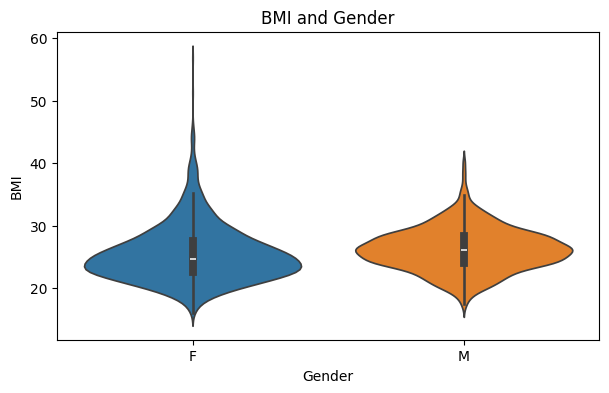

In [ ]:
# Chart - 9 'BMI' vs 'sex'
plt.figure(figsize=(7,4))
sns.violinplot(x='sex', y='BMI', hue='sex', data=df)
plt.title('BMI and Gender')
plt.xlabel('Gender')
plt.ylabel('BMI')
plt.show()

##### 1. Why did you pick the specific chart?

Violin plots offer a comprehensive view of data distribution, revealing its shape, spread, and density. They provide insights into the median, quartiles, and outliers, akin to box plots. Moreover, the varying width of the violin at different points signifies the data density at those values.

##### 2. What is/are the insight(s) found from the chart?

Healthy BMI is considered to lie between 20-25. Here BMI of most of the males lie slightly above 25 and most of the felames lie bel0w 25. But the whisker of violin plot in female goes up to 55-60 which might be due to some noise in the data.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights suggest that on average, males tend to have slightly higher BMI score than females falling within the healthy BMI range. The presence of outliers among females with higher BMI scores may indicate a subgroup of individuals who are at a greater risk of weight related health issue.

#### Chart - 10
Systolic Blood Pressure and Gender

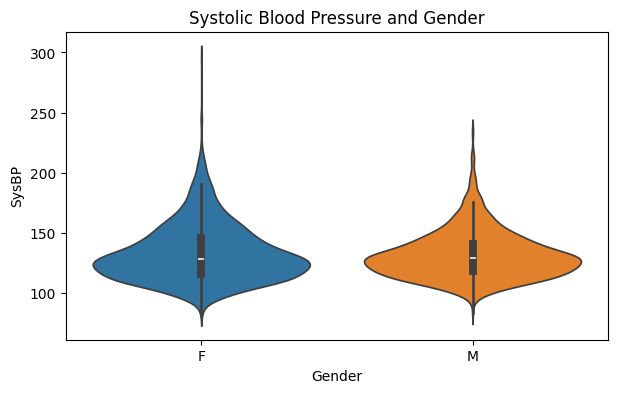

In [ ]:
# Chart - 10 'sysBP' vs 'sex'
plt.figure(figsize=(7,4))
sns.violinplot(x='sex', y='sysBP', hue='sex', data=df)
plt.title('Systolic Blood Pressure and Gender')
plt.xlabel('Gender')
plt.ylabel('SysBP')
plt.show()

##### 1. Why did you pick the specific chart?

Violin plots present a holistic view of data distribution, revealing its shape, spread, and density. They provide insights into the median, quartiles, and outliers, similar to box plots. Furthermore, the varying width of the violin at different points signifies the data density at those values.

##### 2. What is/are the insight(s) found from the chart?

In some cases, females exhibit elevated blood pressure levels compared to males.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights from the violin plot can help identify potential gender-specific differences in systolic blood pressure, which could inform targeted healthcare.

#### Chart - 11
Continuous data distribution

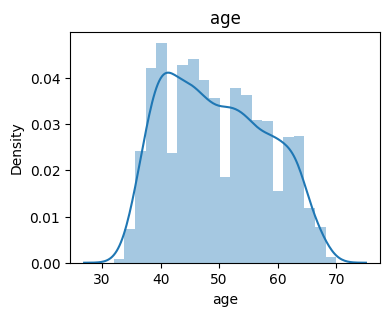

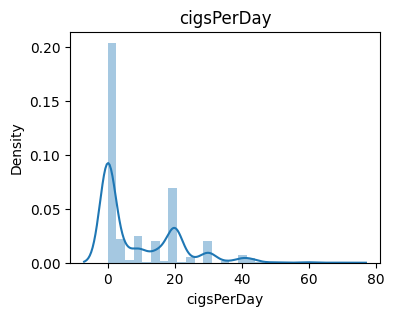

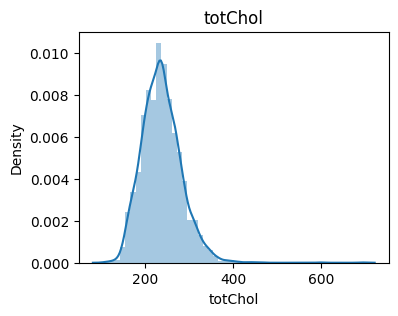

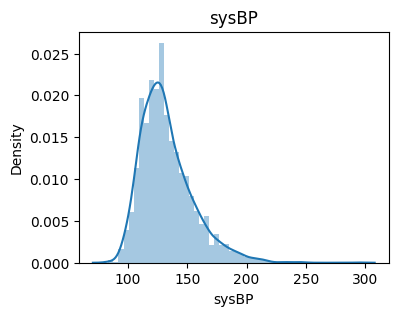

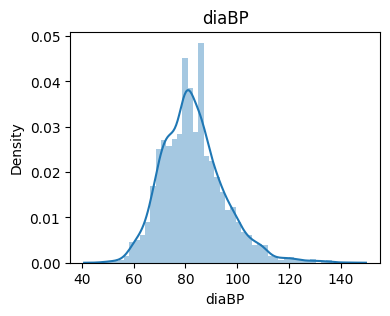

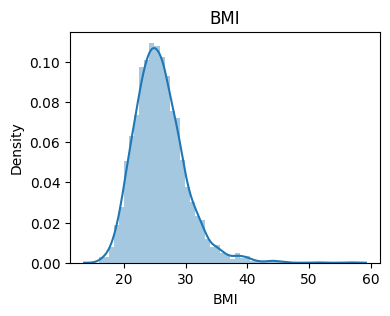

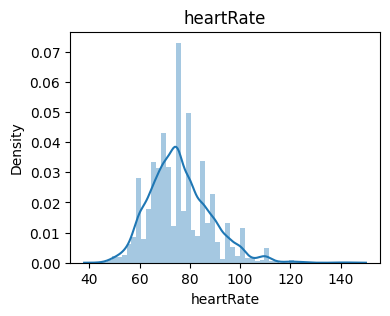

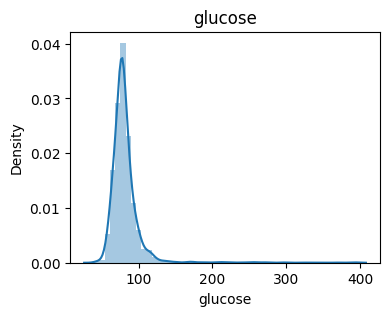

In [ ]:
# Chart - 11 Distplots for the distribution of continuous data
for i in continuous:
    if i not in ['TenYearCHD']:
        plt.figure(figsize=(4,3))
        sns.distplot(df[i])
        plt.title(i)
        plt.show()

##### 1. Why did you pick the specific chart?

Used distplot to show data distribution.

##### 2. What is/are the insight(s) found from the chart?

The provided distribution plots indicate a significant skew in the data, suggesting the need for transformation to achieve a more symmetrical distribution.

#### Chart - 12 - Correlation Heatmap

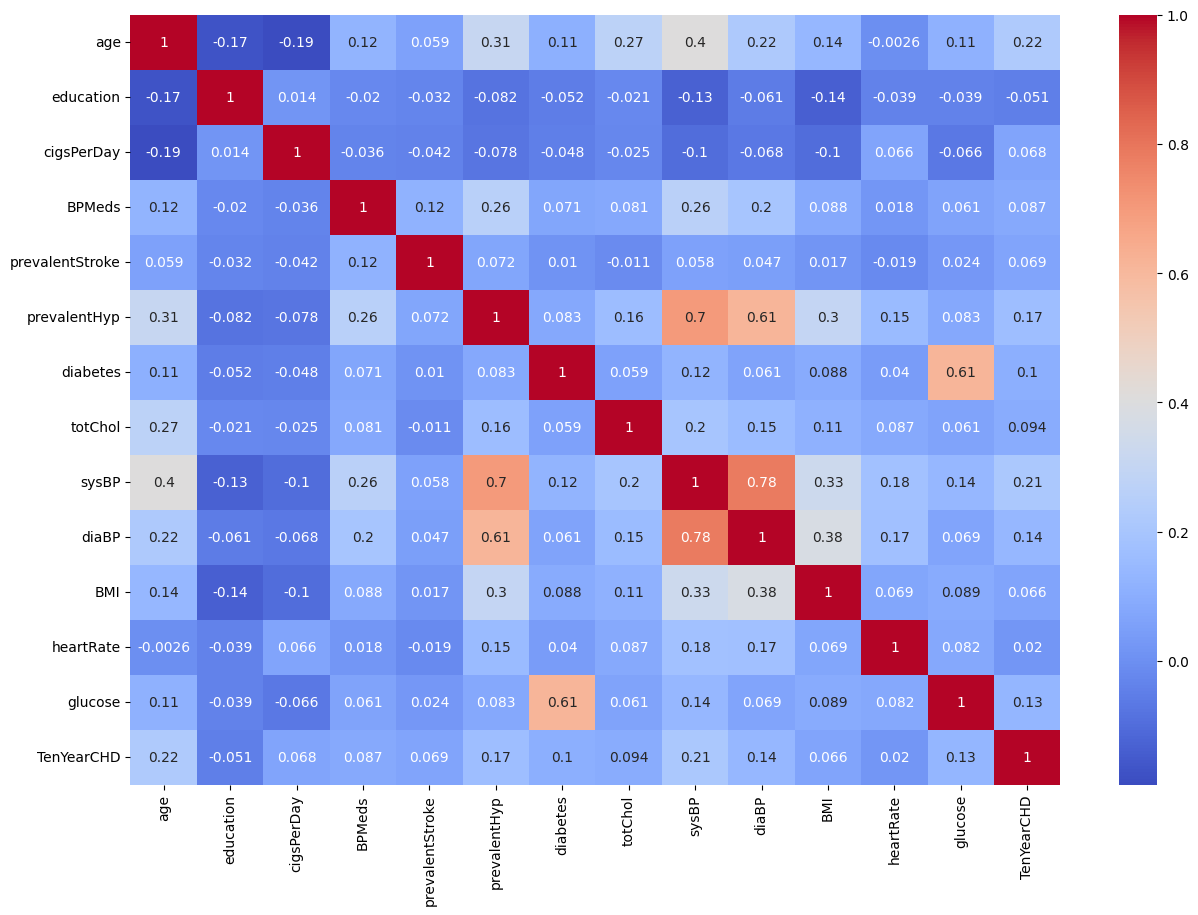

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

##### 1. Why did you pick the specific chart?

I used heatmap to visualize the correlation among numerical features.

##### 2. What is/are the insight(s) found from the chart?

sysBP - prevalentHyp, diaBP - sysBP, diaBO - prevalentHyp, glucose - diabetes are highly correlated.

#### Chart - 13 - Pair Plot

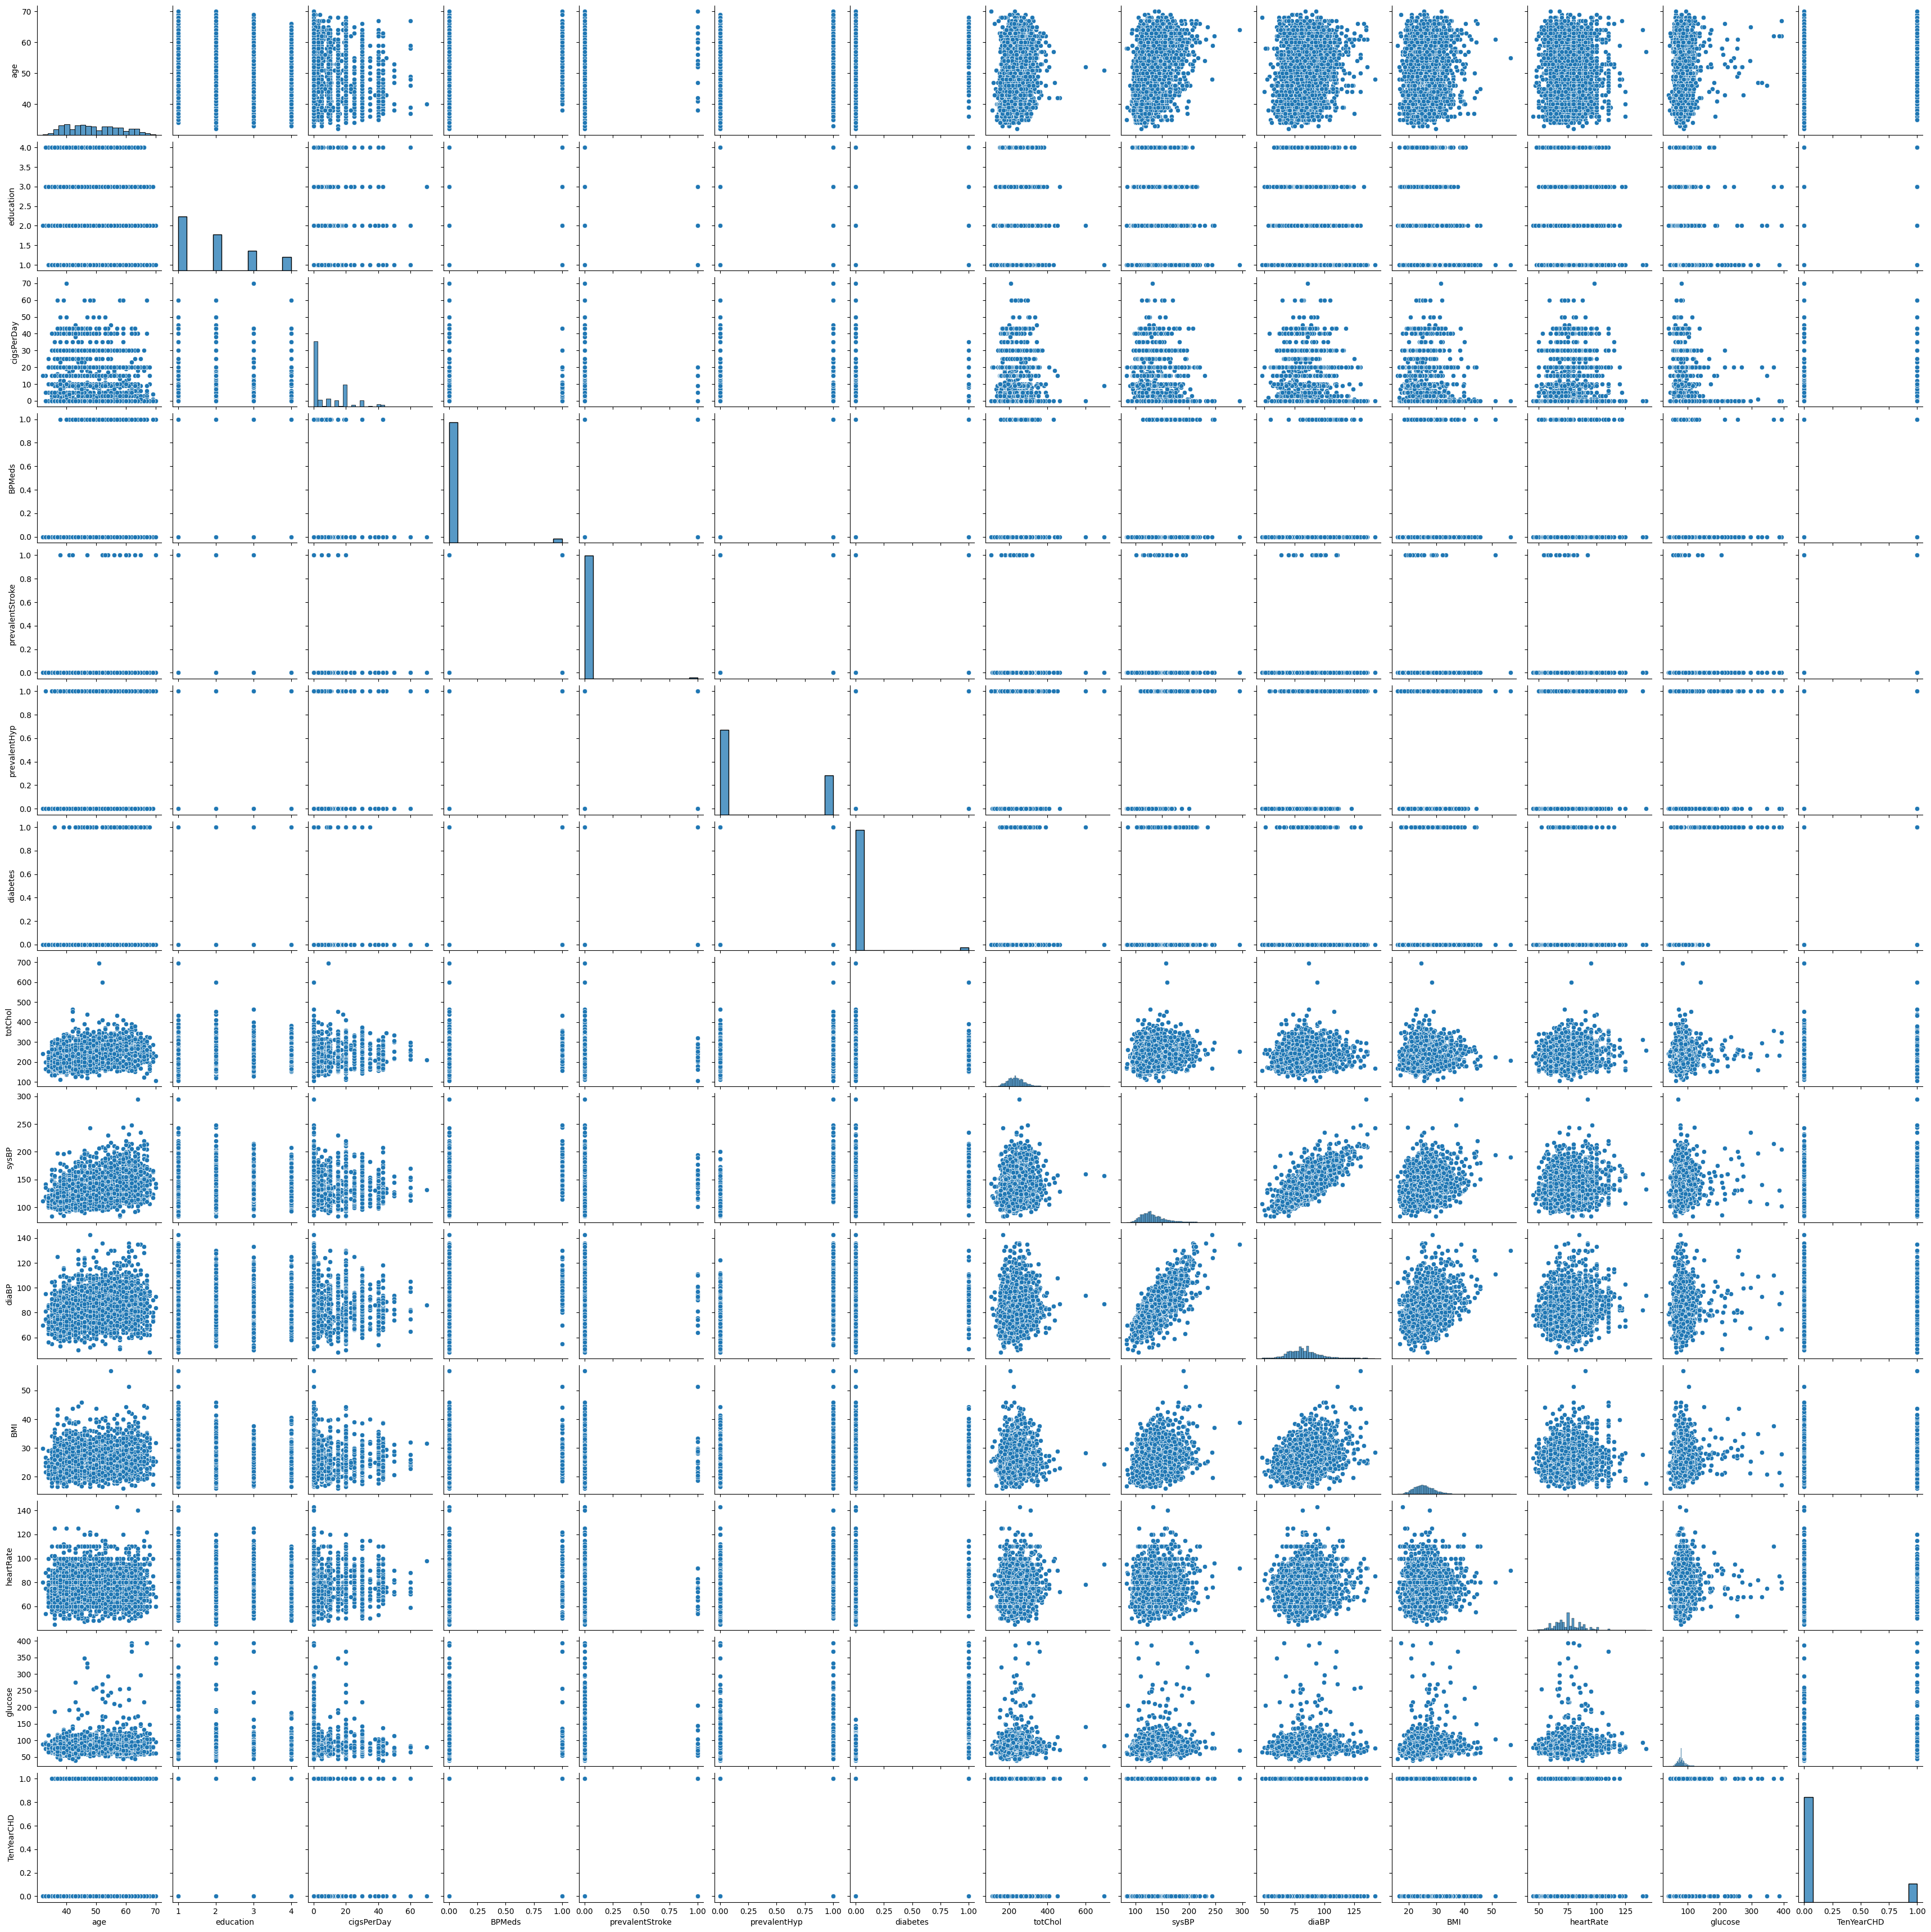

In [ ]:
# Pair Plot visualization code
sns.pairplot(df)
plt.show()

##### 1. Why did you pick the specific chart?

I used pair plot to visualize the relationship between different variables in the dataset.

##### 2. What is/are the insight(s) found from the chart?

Here also we can see the high correlation among sysBP - prevalentHyp, diaBP - sysBP, diaBO - prevalentHyp, and glucose - diabetes.

## ***5. Hypothesis Testing***

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

null_hypothesis(Ho) = 'There is no relationship between is_smoking and TenYearCHD'

alternate_hypothesis(Ha) = 'There is a relationship between is_smoking and TenYearCHD'

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import statsmodels.api as sm

# Defining null and alternate hypothesis
null_hypothesis = "There is no relationship between is_smoking and TenYearCHD"
alternate_hypothesis = "There is a relationship between is_smoking and TenYearCHD"

# Performing linear regression
X = sm.add_constant(df['is_smoking'].apply(lambda x: 1 if x == 'YES' else 0))
y = df['TenYearCHD']
model = sm.OLS(y, X).fit()

# Printing summary statistics
print(model.summary())

# Extracting p-value for temperature coefficient
p_value = model.pvalues[1]
print('p-value : ',p_value)

                            OLS Regression Results                            
Dep. Variable:             TenYearCHD   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.954
Date:                Wed, 16 Oct 2024   Prob (F-statistic):             0.0468
Time:                        17:04:26   Log-Likelihood:                -1324.0
No. Observations:                3390   AIC:                             2652.
Df Residuals:                    3388   BIC:                             2664.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1386      0.009     15.988      0.0

##### Which statistical test have you done to obtain P-Value?

I used the OLS(Ordinary Least Squares) model from the statsmodels package.

Here the p-value (0.0468) is below the significance level of 0.05, we can reject the null hypothesis, which states that there is no relationship between is_smoking and TenYearCHD. Consequently, the data provides sufficient evidence to support the alternative hypothesis that there is indeed a relationship between is_smoking and TenYearCHD.

##### Why did you choose the specific statistical test?

The OLS regression model is commonly used to assess the relationship between a dependent variable and one or more independent variables.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values


Since we have already addressed the missing values during the data wrangling process, there is no need to handle them again.

#### What all missing value imputation techniques have you used and why did you use those techniques?

1. I found that the data had some missing values so I imputed them with median and mode features.

2. Segregated the data into discrete and continuous features for better understanding and analysis of independent variables.

### 2. Handling Outliers

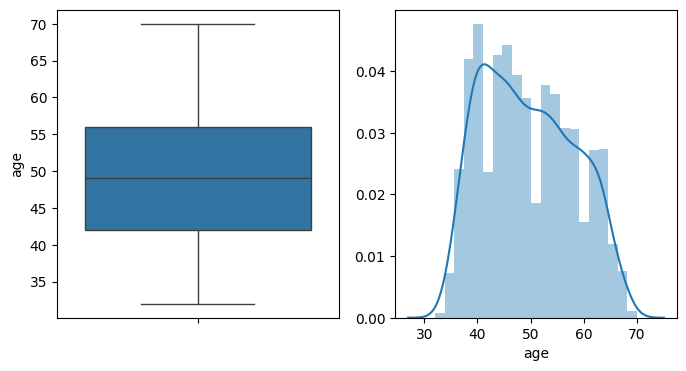

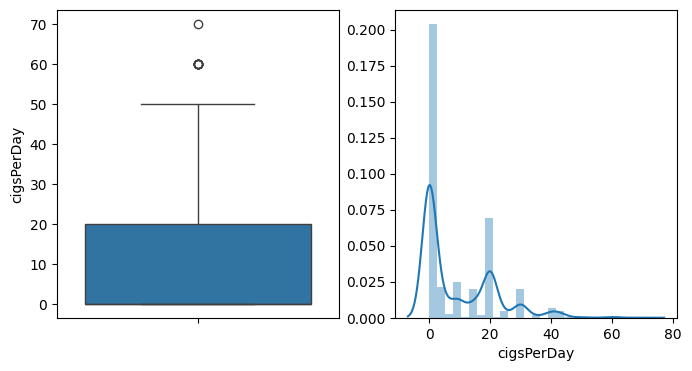

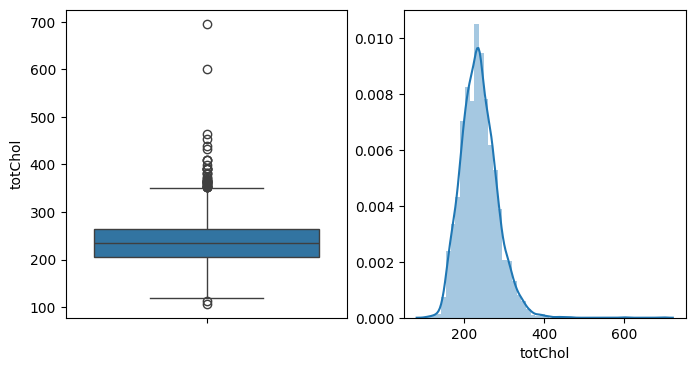

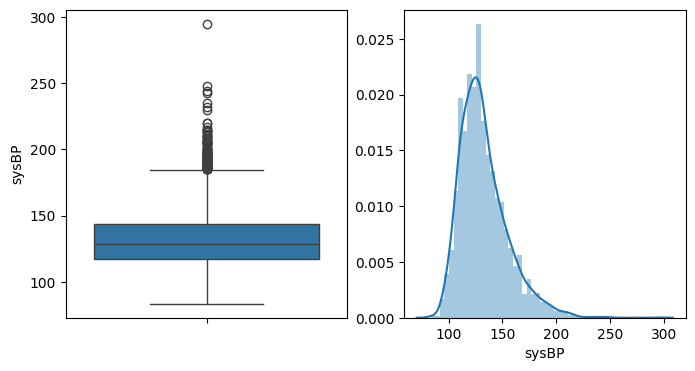

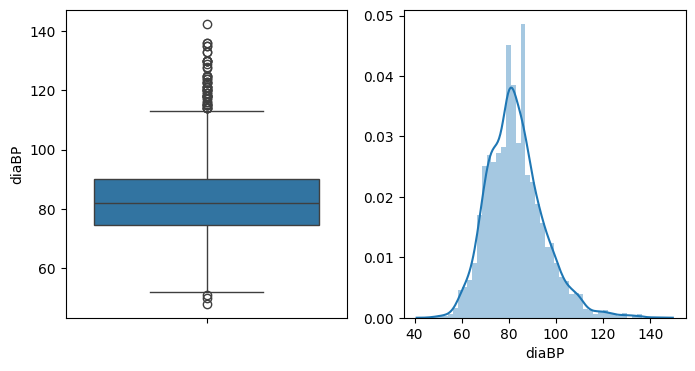

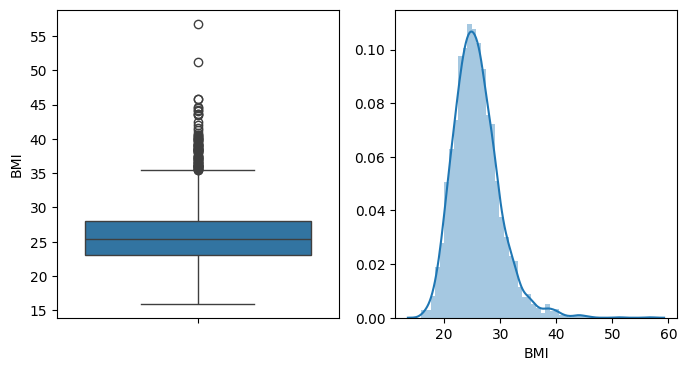

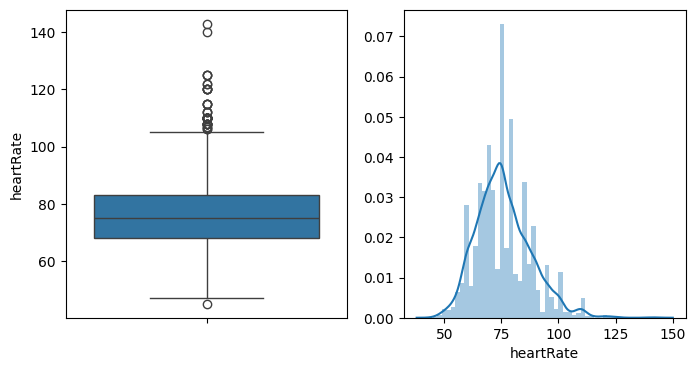

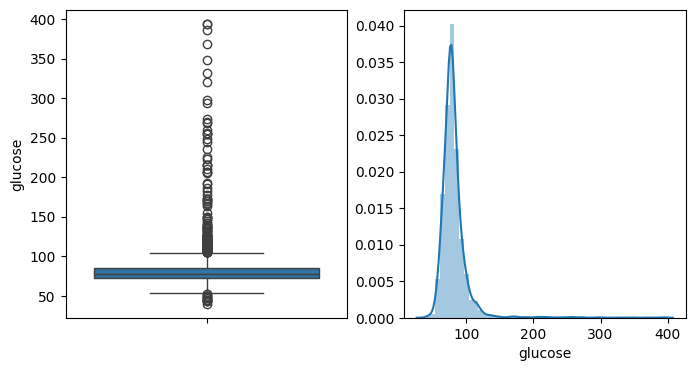

In [ ]:
# Checking outliers
for var in continuous:
    plt.figure(figsize=(8,4))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y = df[var])
    fig.set_title('')

    plt.subplot(1, 2, 2)
    fig = sns.distplot(df[var].dropna())
    fig.set_ylabel('')
    fig.set_xlabel(var)

    plt.show()

In [ ]:
# Handling Outliers & Outlier treatments

# Capping the outlier rows with percentiles
for i in continuous:
    upper_lim = df[i].quantile(.95)
    lower_lim = df[i].quantile(.05)
    # df[i] = np.where(df[i] > upper_lim, upper_lim, np.where(df[i] < lower_lim, lower_lim, df[i]))
    df.loc[(df[i] > upper_lim), i] = upper_lim
    df.loc[(df[i] < lower_lim), i] = lower_lim

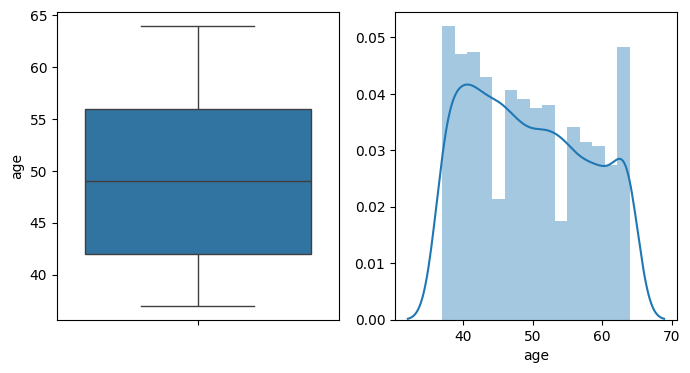

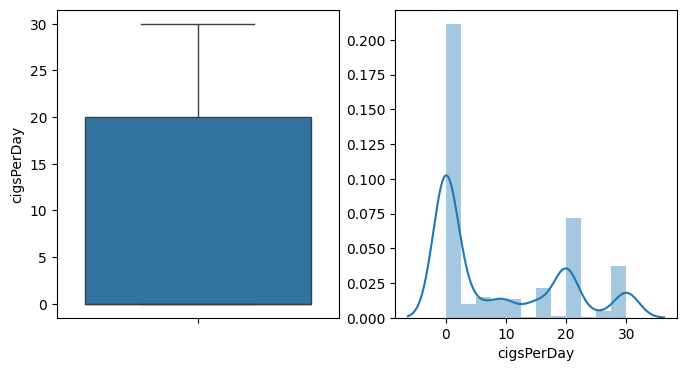

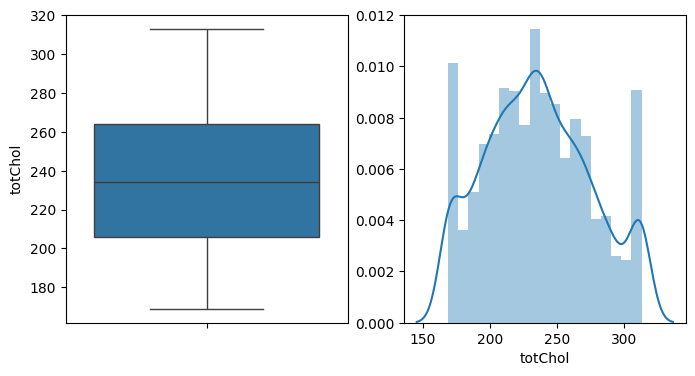

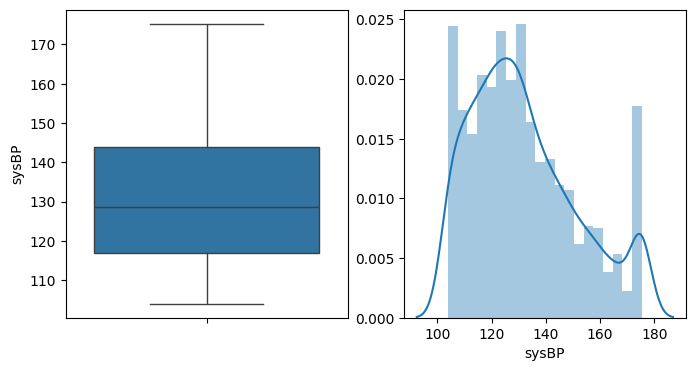

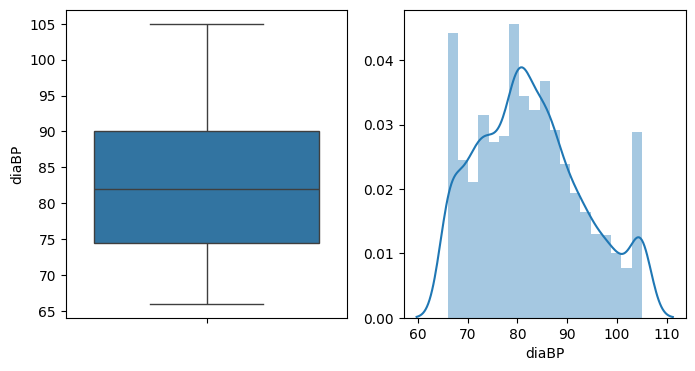

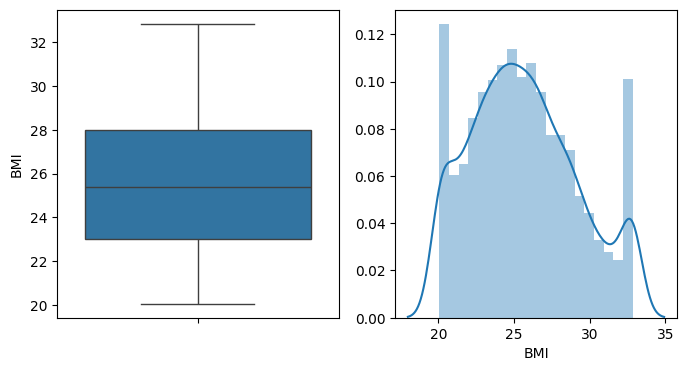

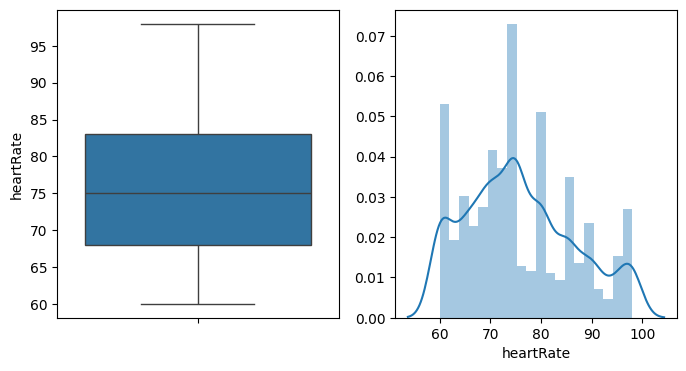

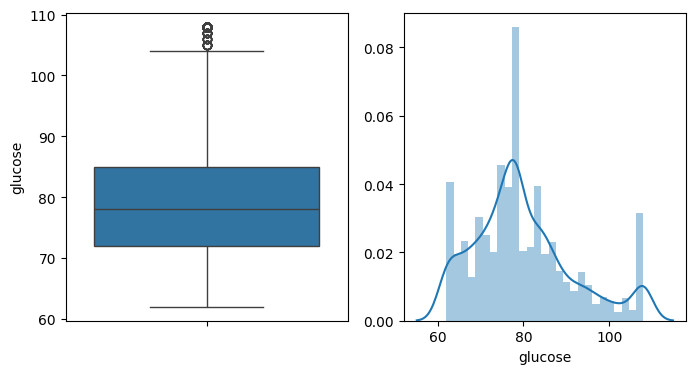

In [ ]:
# Checking outliers again
for var in continuous:
    plt.figure(figsize=(8,4))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y = df[var])
    fig.set_title('')

    plt.subplot(1, 2, 2)
    fig = sns.distplot(df[var].dropna())
    fig.set_ylabel('')
    fig.set_xlabel(var)

    plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

I addressed the outliers by applying outlier capping using quantiles.

### 3. Categorical Encoding

In [ ]:
# Encoding categorical columns
df['sex'] = df['sex'].apply(lambda x: 1 if x == 'M' else 0)
df['is_smoking'] = df['is_smoking'].apply(lambda x: 1 if x == 'YES' else 0)

#### What all categorical encoding techniques have you used & why did you use those techniques?

I employed label encoding to categorize the class labels.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

There are no such features which can be manipulated further.

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
X = df.drop(['TenYearCHD'], axis=1)
y = df['TenYearCHD']

In [ ]:
# Defining a function to calculate VIF

def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif['variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif.sort_values(by='VIF', ascending=False).reset_index(drop=True))

In [ ]:
independent_variables = [i for i in df.columns if i not in ['TenYearCHD']]
calc_vif(df[independent_variables])

variables         VIF
0             sysBP  177.412662
1             diaBP  167.199912
2               BMI   61.597415
3         heartRate   50.724797
4           glucose   47.147752
5               age   47.101645
6           totChol   40.338650
7        is_smoking    5.838418
8        cigsPerDay    5.184057
9         education    4.657434
10     prevalentHyp    2.571503
11              sex    2.160796
12           BPMeds    1.130782
13         diabetes    1.112065
14  prevalentStroke    1.026454

In [ ]:
# Eliminating features with high VIF
independent_variables = [i for i in df.columns if i not in ['TenYearCHD', 'sysBP','diaBP','BMI','glucose','totChol','heartRate','is_smoking']]
calc_vif(df[independent_variables])

variables       VIF
0              age  5.442645
1        education  3.995999
2              sex  1.976329
3       cigsPerDay  1.805761
4     prevalentHyp  1.685179
5           BPMeds  1.120342
6         diabetes  1.044625
7  prevalentStroke  1.024795

In [ ]:
# We can consider the above 8 features having less vif score. Rest of the features will be dropped from X.
X = df.drop(columns=['TenYearCHD', 'sysBP','diaBP','BMI','glucose','totChol','heartRate','is_smoking'], axis=1)
y = df['TenYearCHD']

##### What all feature selection methods have you used  and why?

I used VIF method to check and remove multicollinearity.

##### Which all features you found important and why?

1. age
2. education
3. sex
4. cigsPerDay
5. prevalentHyp
6. BPMeds
7. diabetes
8. prevalentStroke

The above features are chosen based on the VIF scores to rediuce multicoliinearity so it doesn't effect the accuracy of our model.

### 5. Data Transformation

In [ ]:
# Transforming the data with log transformation
X = np.log(X+1)

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Data transformation is needed as we have seen the data is skewed in nature.

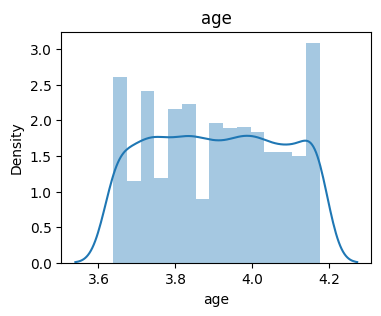

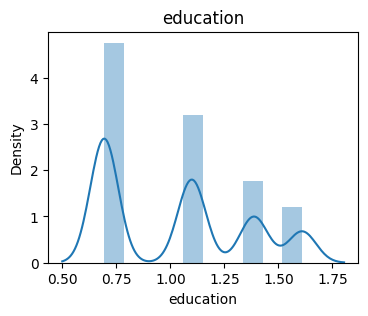

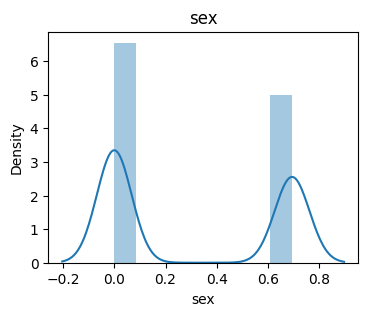

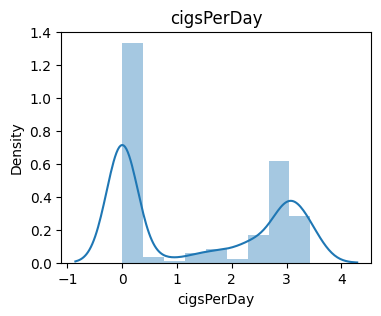

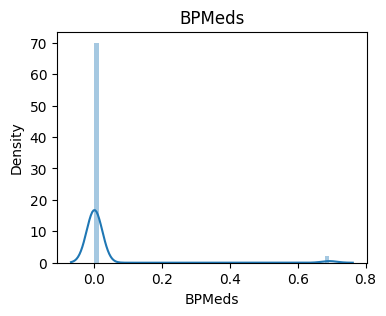

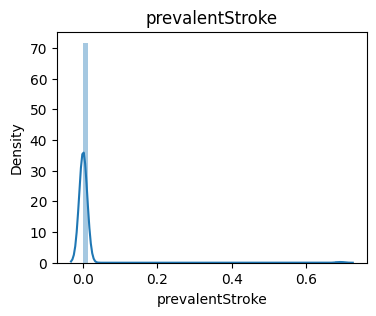

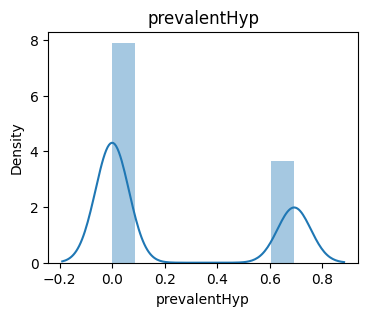

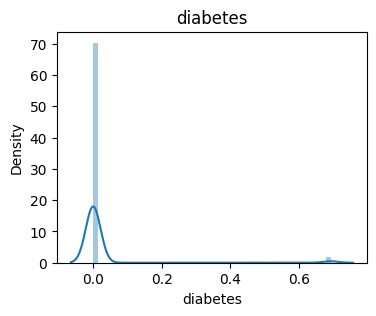

In [ ]:
# Visualizing the data after log transformation
for i in X.columns:
    plt.figure(figsize=(4,3))
    sns.distplot(X[i])
    plt.title(i)
    plt.show()

### 6. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Choosing test_size = 0.3 and stratify = y as our data is imbalanced

##### What data splitting ratio have you used and why?

I've used 70% data for training purpose and 30% data for testing purpose.

### 7. Data Scaling

In [ ]:
# Scaling your data
ms = MinMaxScaler()

X_train = ms.fit_transform(X_train)
X_test = ms.transform(X_test)

##### Which method have you used to scale you data and why?

I have used MinMaxScaler method to scale the data as it ensures that the feature values are normalized to a specific range.
It scales the features by transforming them to a range between 0 and 1.

### 8. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

In [ ]:
# Checking data imbalance
print(df['TenYearCHD'].value_counts())

TenYearCHD
0    2879
1     511
Name: count, dtype: int64


Given the imbalance in the dataset, it is necessary to apply a sampling technique to address this issue.

In [ ]:
# Handling Imbalanced Dataset
from imblearn.combine import SMOTETomek

# Creating an instance of SMOTETomek
smk = SMOTETomek(random_state=42)

# Applying SMOTETomek to generate synthetic samples
X_train, y_train = smk.fit_resample(X_train, y_train)

print(X_train.shape)
print(y_train.shape)

(3892, 8)
(3892,)


##### What technique did you use to handle the imbalance dataset and why?

I have used SMOTETomek technique to address the imbalance in the dataset.

## ***7. ML Model Implementation***

In [ ]:
# Defining a function to train the input model and print evaluation metrics

score_df = pd.DataFrame()

scoring = make_scorer(f1_score, pos_label=1)

features = [i for i in df.columns if i not in ['TenYearCHD']]

def analyze_model(model, X_train, y_train, X_test, y_test):

    # Training the model
    model.fit(X_train, y_train)

    # Feature importance
    try:
      try:
        importance = model.feature_importance_
        feature = features
      except:
        importance = np.abs(model.coef_[0])
        features = independent_variables
      indices = np.argsort(importance)
      indices = indices[::-1]
    except:
      pass

    # Plotting evaluation metrics for train and test dataset
    for X, act, label in ((X_train, y_train, 'Train-set'),(X_test, y_test, 'Test-set')):

      # Getting required metrics
      pred = model.predict(X)
      pred_proba = model.predict_proba(X)[:,1]
      report = pd.DataFrame(classification_report(y_pred=pred, y_true=act, output_dict=True))
      fpr, tpr, thresholds = roc_curve(y_true=act, y_score=pred_proba)

      # Classification report
      plt.figure(figsize=(18,4))
      plt.subplot(1,3,1)
      sns.heatmap(report.iloc[:-1,:-1].T, annot=True, cmap='coolwarm')
      plt.title(f'{label} Report')

      # Confusion matrix
      plt.subplot(1,3,2)
      sns.heatmap(confusion_matrix(y_pred=pred, y_true=act), annot=True, cmap='coolwarm')
      plt.title(f'{label} Confusion Matrix')
      plt.xlabel('Predicted labels')
      plt.ylabel('Actual labels')

      global score_df
      score_df[model] = {'Precision' : precision_score(act, pred), 'Recall' : recall_score(act, pred), 'F1-Score' : f1_score(act, pred), 'Accuracy' : accuracy_score(act, pred)}

      # AUC_ROC Curve
      plt.subplot(1,3,3)
      plt.plot([0,1],[0,1],'k--')
      plt.plot(fpr, tpr, label=f'AUC - {np.round(np.trapz(tpr,fpr),3)}')
      plt.legend(loc=4)
      plt.title(f'{label} AUC-ROC Curve')
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive Rate')
      plt.tight_layout()

    # Plotting feature importance
    try:
      plt.figure(figsize=(18,4))
      plt.bar(range(len(indices)), importance[indices], color='b', align='center')
      plt.xticks(range(len(indices)), [features[i] for i in indices], rotation=90)
      plt.title('Feature Importance')
      plt.tight_layout()
    except:
      pass
    plt.show()
    return model

### ML Model - 1

###Logistic Regression

In [ ]:
# ML Model - 1 Implementation
lr = LogisticRegression()

# Cross validation & Hyperparameter Tuning
grid = {
    'penalty' : ['l1', 'l2'],   # Regularization penalty (L1 or L2)
    'C' : [0.1, 1.0, 10.0],     # Inverse of regularization strength
    'solver' : ['liblinear', 'saga'],     # Solver algorithm
    'max_iter' : [100, 200, 300, 1000, 10000]     # Maximum number of iterations
}

# GridSearch to find the best parameters
lr_cv = GridSearchCV(lr, param_grid = grid, cv=5)
lr_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1.0, 10.0],
                         'max_iter': [100, 200, 300, 1000, 10000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

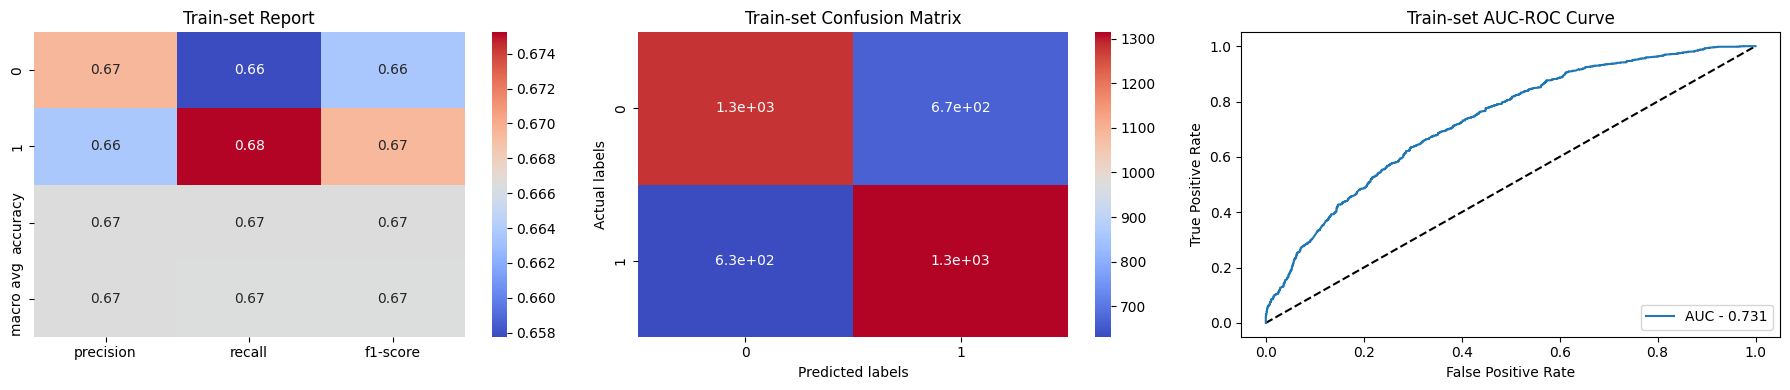

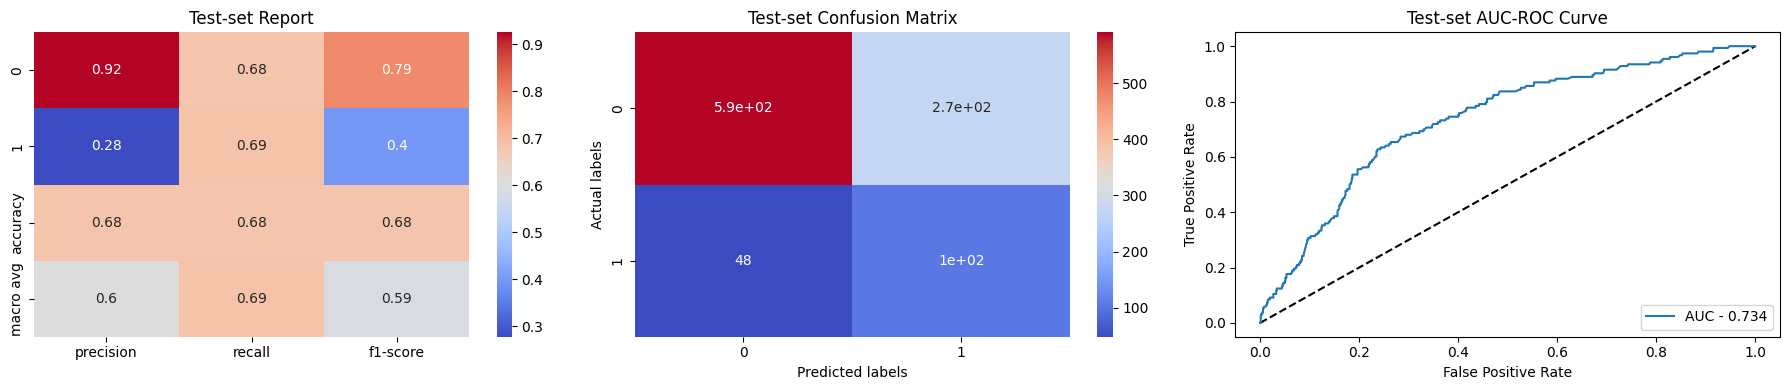

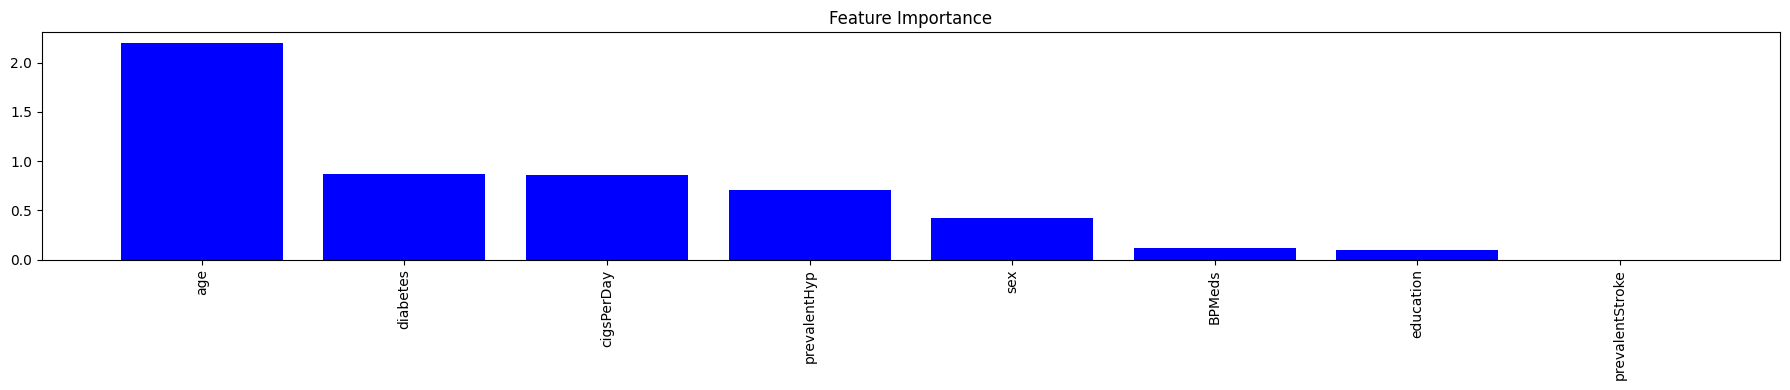

LogisticRegression(penalty='l1', solver='liblinear')

In [ ]:
# Visualizing evaluation Metric Score chart
analyze_model(lr_cv.best_estimator_, X_train, y_train, X_test, y_test)

### ML Model - 2
###Support Vector Classifier

In [ ]:
# SVM algorithm
svc = SVC(random_state = 0, probability=True)

# Cross - Validation & Hyperparameter Tuning
grid = {
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'C' : [0.1, 1.0, 10.0, 100],
    'max_iter' : [1000]
}

# GridSearch to find the best parameter
SVC_cv = GridSearchCV(svc, param_grid = grid, cv=5)
SVC_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=0),
             param_grid={'C': [0.1, 1.0, 10.0, 100],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'max_iter': [1000]})

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

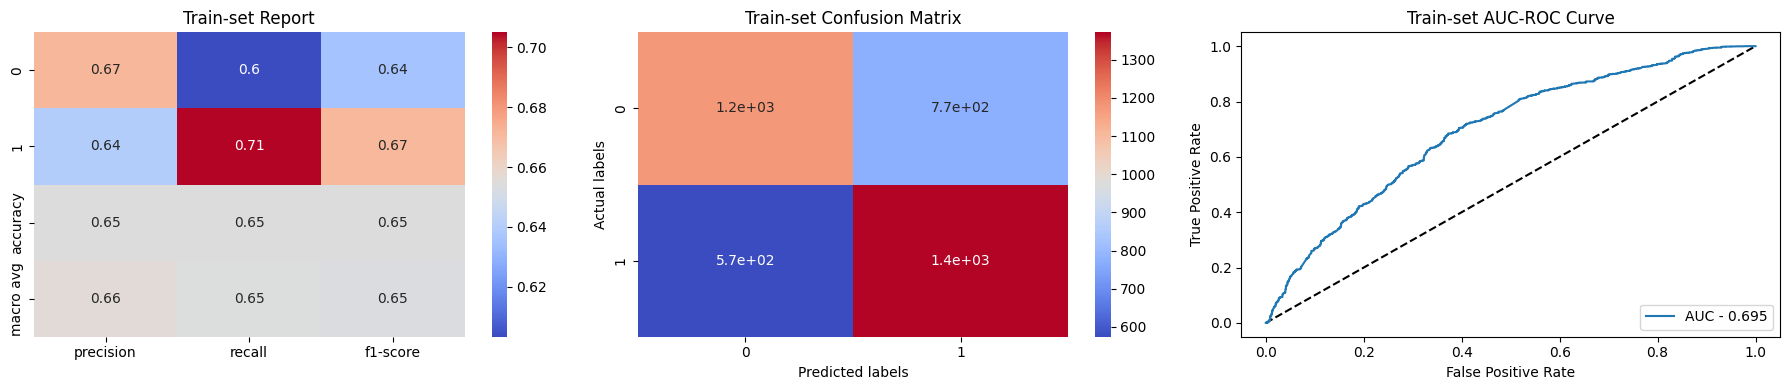

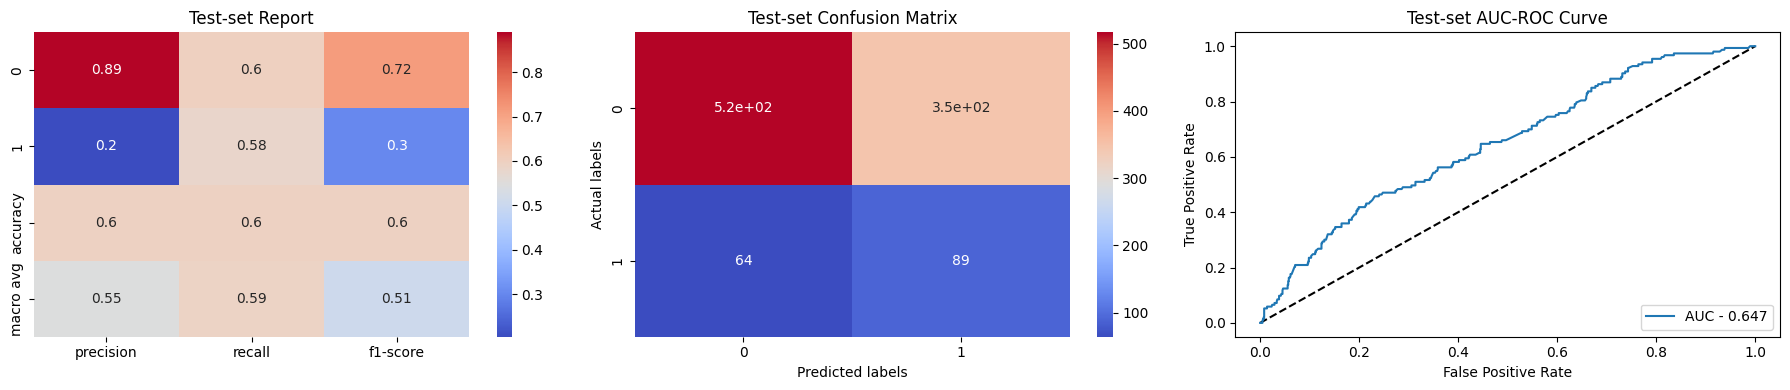

<Figure size 1800x400 with 0 Axes>

SVC(max_iter=1000, probability=True, random_state=0)

In [ ]:
# Visualizing evaluation Metric Score chart
analyze_model(SVC_cv.best_estimator_, X_train, y_train, X_test, y_test)

### ML Model - 3
###Naive Bayes Classifier

In [ ]:
# ML Model - 3 Naive Bayes Classifier
nbc = GaussianNB()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

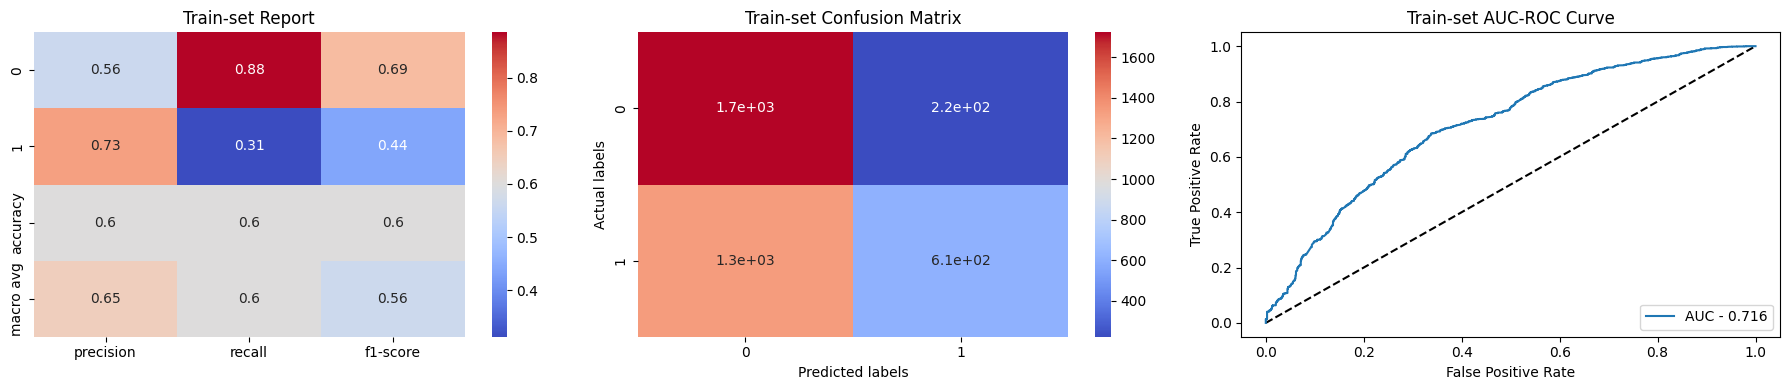

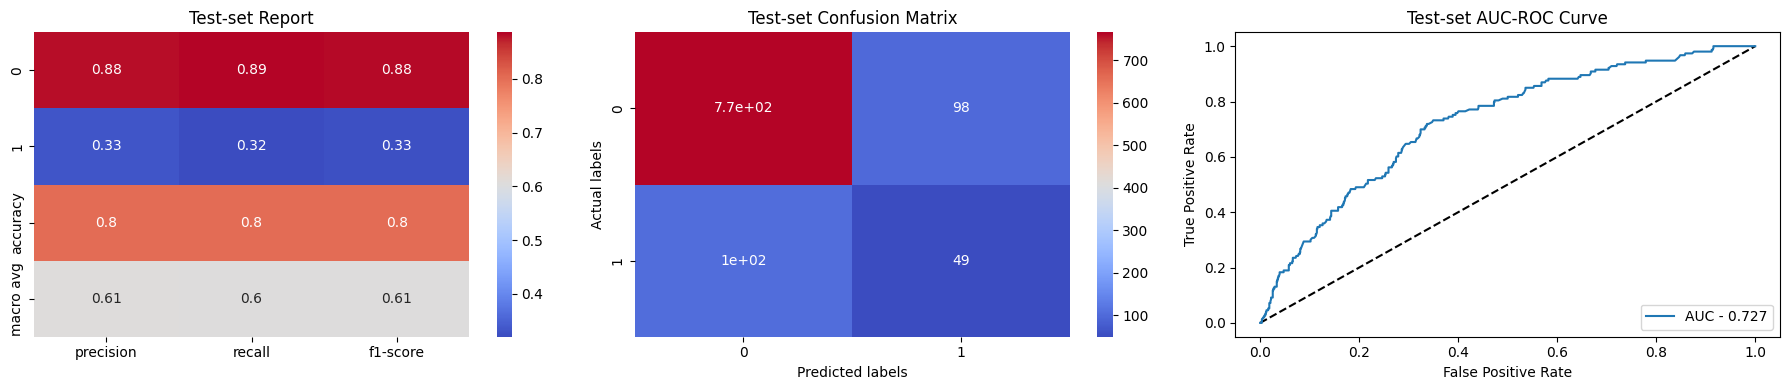

<Figure size 1800x400 with 0 Axes>

GaussianNB()

In [ ]:
# Visualizing evaluation Metric Score chart
analyze_model(nbc, X_train, y_train, X_test, y_test)

### ML Model - 4
###XGBoost Classifier

In [ ]:
# ML Model - 4 XGBoost Classifier
xgb = XGBRFClassifier()

# Cross Validation & Hyperparameter Tuning
# Hyperparameter Grid
grid = {
    'n_estimators' : [150],
    'max_depth' : [8,10],
    'eta' : [0.05, 0.08, 0.1]
}

# GridSearch to find best parameters
xgb_cv = GridSearchCV(xgb, param_grid = grid, cv=5)
xgb_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRFClassifier(base_score=None, booster=None,
                                       callbacks=None, colsample_bylevel=None,
                                       colsample_bytree=None, device=None,
                                       early_stopping_rounds=None,
                                       enable_categorical=False,
                                       eval_metric=None, feature_types=None,
                                       gamma=None, grow_policy=None,
                                       importance_type=None,
                                       interaction_constraints=None,
                                       max_bin=None, max_cat_threshold=None,
                                       max_cat_to_onehot=None,
                                       max_delta_step=None, max_depth=None,
                                       max_leaves=None, min_child_weight=None,
                                       missing=nan, monotone_constraints=None,
                                       multi_strategy=None, n_estimators=None,
                                       n_jobs=None, num_parallel_tree=None,
                                       objective='binary:logistic',
                                       random_state=None, reg_alpha=None, ...),
             param_grid={'eta': [0.05, 0.08, 0.1], 'max_depth': [8, 10],
                         'n_estimators': [150]})

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

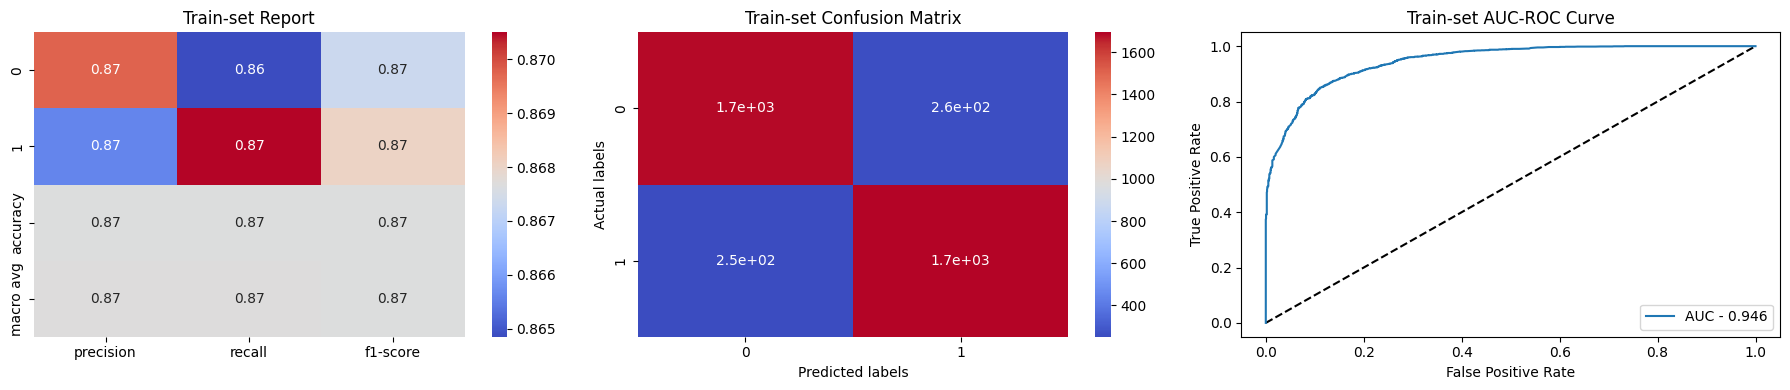

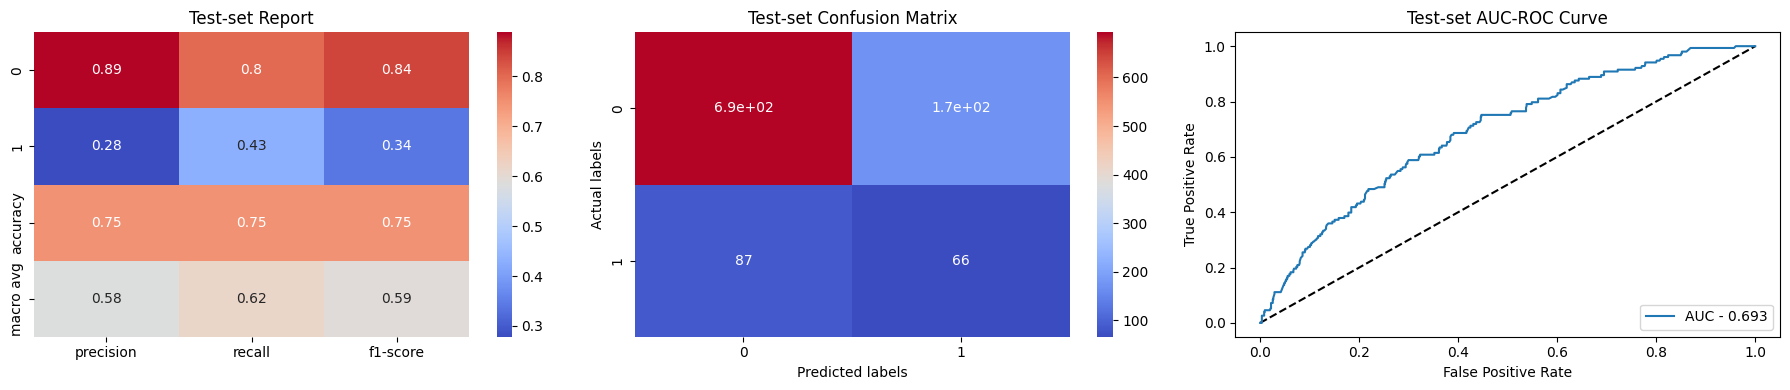

<Figure size 1800x400 with 0 Axes>

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False, eta=0.05,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=10, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=150, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=None, ...)

In [ ]:
# Visualizing evaluation Metric Score chart
analyze_model(xgb_cv.best_estimator_, X_train, y_train, X_test, y_test)

### ML Model - 5
###KNN Classifier

In [ ]:
# ML Model - 5 KNN Classifier

knn = KNeighborsClassifier()

# HYperparameter Grid
grid = {'n_neighbors' : [5,7,9],
        'metric' : ['minkowski','euclidean','manhattan']}

# GridSearch to find the best parameters
knn_cv = GridSearchCV(knn, param_grid = grid, scoring = scoring, cv=5)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9]},
             scoring=make_scorer(f1_score, response_method='predict', pos_label=1))

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

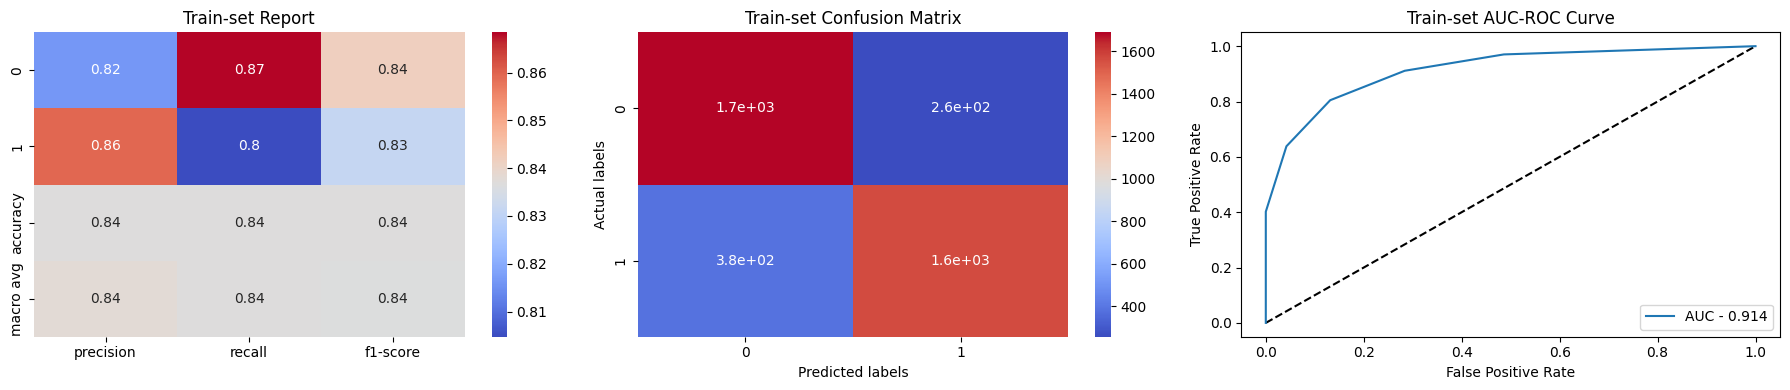

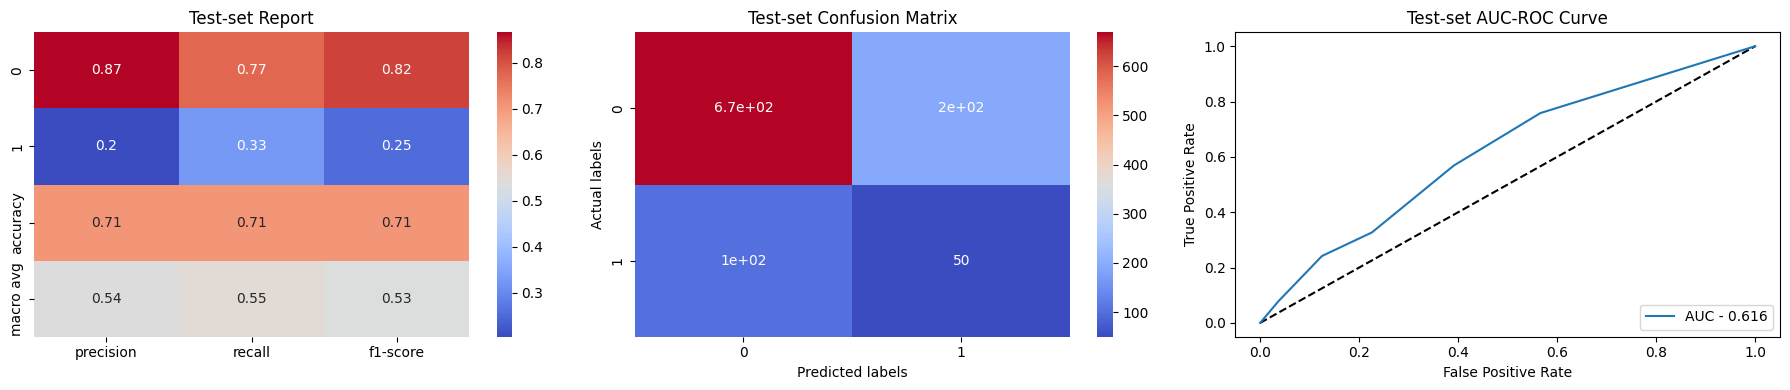

<Figure size 1800x400 with 0 Axes>

KNeighborsClassifier(metric='manhattan')

In [ ]:
# Visualizing evaluation Metric Score chart
analyze_model(knn_cv.best_estimator_, X_train, y_train, X_test, y_test)

### ML Model - 6
###Neural Network Classifier

In [ ]:
# ML Model - 6 Neural Network Classifier
mlp = MLPClassifier(random_state=0)

# Cross Validation & Hyperparameter Tuning
# Hyperparameter Grid
grid = {
      'hidden_layer_sizes': [(50,), (100,)],
      'activation': ['relu', 'tanh'],
      'solver': ['adam', 'sgd'],
      'alpha': [0.0001, 0.001],
      'learning_rate': ['constant', 'adaptive'],
}

# GridSearch to find best parameters
mlp_cv = GridSearchCV(mlp, param_grid = grid, cv=5, scoring=scoring)
mlp_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(random_state=0),
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.001],
                         'hidden_layer_sizes': [(50,), (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['adam', 'sgd']},
             scoring=make_scorer(f1_score, response_method='predict', pos_label=1))

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

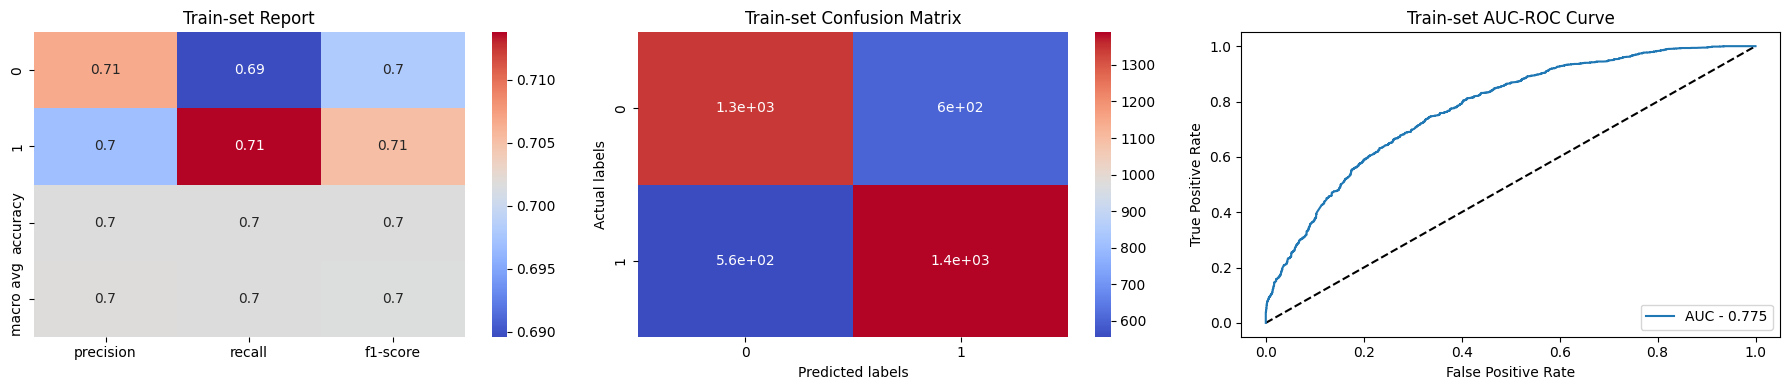

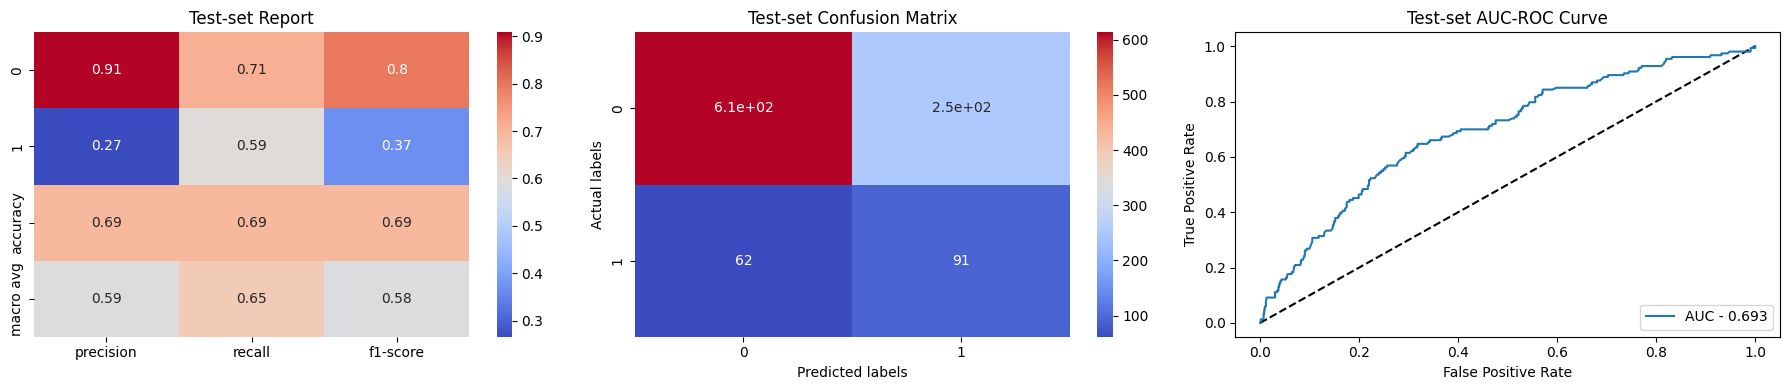

<Figure size 1800x400 with 0 Axes>

MLPClassifier(random_state=0)

In [ ]:
# Visualizing evaluation Metric Score chart
analyze_model(mlp_cv.best_estimator_, X_train, y_train, X_test, y_test)

In [ ]:
# Defining dataframe to store data scores
score_df = score_df.T
score_df['model'] = ['Logistic Regression', 'Support Vector Classifier', 'GaussianNB', 'XGBoost Classifier', 'KNN Classifier', 'Neural Network Classifier']
score_df = score_df.set_index('model')
score_df

Precision    Recall  F1-Score  Accuracy
model                                                             
Logistic Regression         0.277778  0.686275  0.395480  0.684366
Support Vector Classifier   0.204128  0.581699  0.302207  0.595870
GaussianNB                  0.333333  0.320261  0.326667  0.801377
XGBoost Classifier          0.278481  0.431373  0.338462  0.746313
KNN Classifier              0.204082  0.326797  0.251256  0.706981
Neural Network Classifier   0.266082  0.594771  0.367677  0.692232

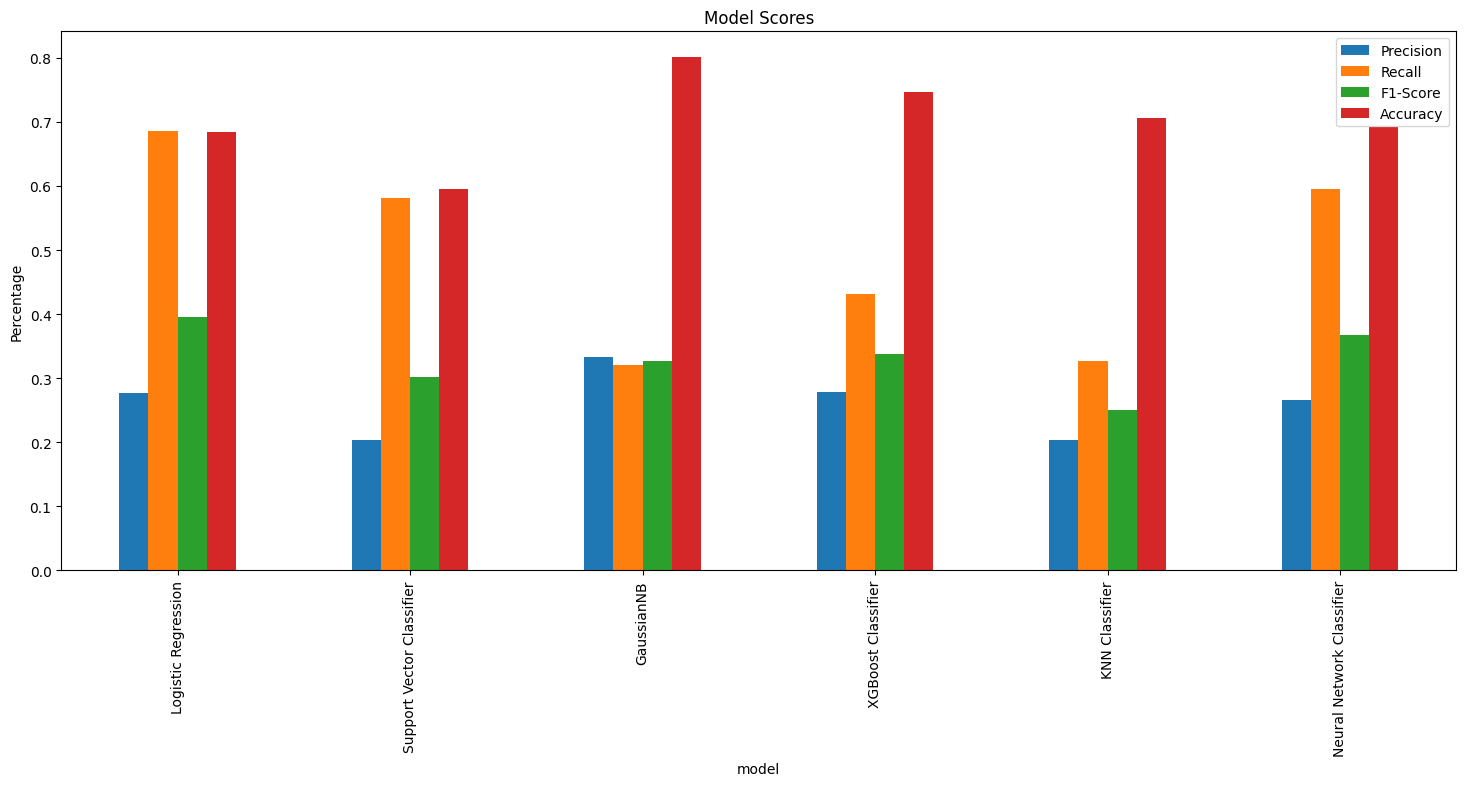

In [ ]:
score_df.plot.bar(figsize=(18,7))
plt.title('Model Scores')
plt.ylabel('Percentage')
plt.show()

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

- **Precision**: Precision measures the accuracy of positive predictions, indicating the proportion of true positives out of all positive predictions. It helps assess the model's performance in minimizing false positives.
  
- **Recall**: Recall, or sensitivity, measures the model's ability to correctly identify actual positives. It is the proportion of true positives detected out of all actual positives, highlighting the model's performance in minimizing false negatives.

- **F1 Score**: The F1 score is the harmonic mean of precision and recall, providing a single metric that balances both. It is especially useful when dealing with imbalanced datasets, where both false positives and false negatives are important.

- **Accuracy**: Accuracy is the proportion of correctly predicted instances (both true positives and true negatives) out of the total instances. It provides a straightforward measure of overall model performance but can be misleading with imbalanced data.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

After evaluating the performance of various machine learning models on the Framingham Heart Study dataset, we selected **Logistic Regression** as our final prediction model. This choice was driven by the model's performance on our primary evaluation metric, recall, which assesses the model's ability to correctly identify patients at risk for CHD. In our analysis, both **Logistic Regression** and a tuned Neural Network achieved the highest recall scores among the models tested.

We prioritized recall as our primary evaluation metric because accurately identifying patients with CHD risk is crucial for our business objectives. By selecting a model with a high recall score, we aim to ensure that we identify as many at-risk patients as possible, even at the expense of a higher false-positive rate. We believe that **Logistic Regression** is the optimal choice for our needs and will contribute significantly to achieving a positive business impact.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

If our goal is to completely avoid missing any patients with heart disease, a high recall is essential. Conversely, if we want to avoid incorrectly treating patients without heart disease, high precision is crucial. In our case, incorrectly classifying patients as having heart disease is equally important because it could indicate other ailments. Therefore, we aim for a balance between precision and recall, making a high F1 score desirable.

To handle the significant class imbalance in the training set, we added synthetic data points. This led to a difference in data distribution between the training and test sets, meaning that the high performance of models on the training set is due to this distribution mismatch rather than overfitting.

The models performed best on the test data based on the following evaluation metrics for class 1:
- **Recall**: Logistic Regression
- **Precision**: GaussianNB
- **F1 Score**: Logistic Regression
- **Accuracy**: GaussianNB

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***